# Dataset Description
**This dataset consist of data From 1985 Ward's Automotive Yearbook and the information therein is derived from the following:**
    1. 1985 Model Import Car and Truck Specifications, 1985 Ward's Automotive Yearbook. 
    2. Personal Auto Manuals, Insurance Services Office
    3. Insurance Collision Report, Insurance Institute for Highway Safety
    


This data set consists of three types of entities: (a) the specification of an auto in terms of various characteristics, (b) its assigned insurance risk rating, (c) its normalized losses in use as compared to other cars. The second rating corresponds to the degree to which the auto is more risky than its price indicates. Cars are initially assigned a risk factor symbol associated with its price. Then, if it is more risky (or less), this symbol is adjusted by moving it up (or down) the scale. Actuarians call this process "symboling". A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe.The third factor is the relative average loss payment per insured vehicle year. This value is normalized for all autos within a particular size classification (two-door small, station wagons, sports/speciality, etc...), and represents the average loss per car per year.

For more information, please refer to the link below:     https://www.kaggle.com/toramky/automobile-dataset

# **The objective is to find the best machine learning algorithm that can predict car prices based on given features.**

## Exploratory Data Analysis (including preprocessing)
1. Initial Dataset Review 
2. Missing values/bad data
3. Target Distribution
4. Type of features 
    - 4a. Numerical Features
        - 4a1. Skewness & Kurtosis
        - 4a2. Correlations of All Numerical Features
        - 4a3. Bifurcation of Highly/Moderately Numerical Features and Lowly Numerical Features 
    - 4b. Categorical Features
        - 4b1. Value_Counts of Category Features
        - 4b2. Range of Target per Category Feature
        - 4b3. Distribution of Target per Highly Correlated Category Feature
        - 4b4. Average Target per Highly Correlated Category Feature 
5. Final DataFrame - Before multi-collinearity considerations
    - 5a. Correlations
    - 5b. Heatmap
6. Features Used for Decision Tree/Random Forest Models
7. Features Used for Regression Models (w/ multi-collinearity considerations)
8. Scaling
## Machine Learning Algorithm
1. Linear Regression
2. Ridge
3. Lasso
4. ElasticNet
5. Knn Regressor
6. Decision Tree
7. Random Forest
## Conclusion
1. Results

# Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
#from sklearn.decomposition import PCA

import statsmodels.api as sm
from sklearn import metrics
from scipy import stats

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor



pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Loading Dataset

In [2]:
auto_df=pd.read_csv(r'https://raw.githubusercontent.com/asrarahmed01/Datasets/master/Automobile_data.csv',na_values=["?",'l'," ? "])

# 1. Initial Dataset Review

In [3]:
auto_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized-losses    164 non-null float64
make                 205 non-null object
fuel-type            205 non-null object
aspiration           205 non-null object
num-of-doors         203 non-null object
body-style           205 non-null object
drive-wheels         205 non-null object
engine-location      205 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
engine-type          193 non-null object
num-of-cylinders     205 non-null object
engine-size          205 non-null int64
fuel-system          205 non-null object
bore                 201 non-null float64
stroke               201 non-null float64
compression-ratio    205 non-null float64
horsepower           203 non-

The dataset consists of 205 observations with 25 features (not including the target variable of "price"). These features have a varying degree of correlation with the target variable which we will explore later on in the analysis. **Initially**, there were no missing values but many columns had special characters like "?" in lieu of a value. Upon analysis, we designated these characters as NaNs in the inital opening of the file resulting in at least 8 columns with less than maximum number of entries (205). Also noted was the fact that there are at least a couple of features that should have a numerical datatype but have an object datatype instead

In [4]:
auto_df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,"13,495"
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,"16,500"
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,"16,500"
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,"13,950"
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,"17,450"


In [5]:
auto_df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg
count,205.000000,164.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,201.000000,201.000000,205.000000,203.000000,203.000000,205.000000,205.000000
mean,0.834146,122.000000,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329751,3.255423,10.142537,104.256158,5125.369458,25.219512,30.751220
std,1.245307,35.442168,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.273539,0.316717,3.972040,39.714369,479.334560,6.542142,6.886443
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000
25%,0.000000,94.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000
50%,1.000000,115.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000
75%,2.000000,150.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.590000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000
max,3.000000,256.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000


# 2. Missing Values

### Replacing Missing Values of numerical features with the mean of the feature:

In [6]:
auto_df["normalized-losses"]=auto_df["normalized-losses"].fillna(auto_df["normalized-losses"].mean())
auto_df["bore"]=auto_df["bore"].fillna(auto_df["bore"].mean())
auto_df["stroke"]=auto_df["stroke"].fillna(auto_df["stroke"].mean())
auto_df["horsepower"]=auto_df["horsepower"].fillna(auto_df["horsepower"].mean())
auto_df[" price "]=auto_df[" price "].str.replace(" ","").str.replace(",","").astype(float)
auto_df[" price "]=auto_df[" price "].fillna(auto_df[" price "].mean())

### We will replace missing values for categorical features (object datatype) with values of similar observations

In [7]:
#Categorical series with missing values

auto_df[auto_df["num-of-doors"].isna()]  #fill-in with a value from similar cars

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
27,1,148.0,dodge,gas,turbo,NaN,sedan,fwd,front,93.7,157.3,63.8,50.6,2191,ohc,four,98,mpfi,3.03,3.39,7.6,102.0,5500.0,24,30,8558.0
63,0,122.0,mazda,diesel,std,NaN,sedan,fwd,front,98.8,177.8,66.5,55.5,2443,ohc,four,122,idi,3.39,3.39,22.7,64.0,4650.0,36,42,10795.0


In [8]:
#similar observations to observations with missing values for "num-of-doors"

Dodge_missing_num_of_doors=(auto_df["make"]=="dodge")&(auto_df["length"]==157.3)&(auto_df["width"]==63.8)&(auto_df["normalized-losses"]==148.0)
auto_df[Dodge_missing_num_of_doors]  #4
Mazda_missing_num_of_doors=(auto_df["make"]=="mazda")&(auto_df["length"]==177.8)&(auto_df["width"]==66.5)&(auto_df["body-style"]=="sedan")
auto_df[Mazda_missing_num_of_doors] #4

#Fill categorical series NaNs with similar observations

auto_df["num-of-doors"]=auto_df["num-of-doors"].fillna("four")

In [9]:
#Categorical series with missing values

auto_df[auto_df["peak-rpm"].isna()]  #fill-in with a value from similar cars

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
130,0,122.0,renault,gas,std,four,wagon,fwd,front,96.1,181.5,66.5,55.2,2579,ohc,four,132,mpfi,3.46,3.9,8.7,104.256158,NaN,23,31,9295.0
131,2,122.0,renault,gas,std,two,hatchback,fwd,front,96.1,176.8,66.6,50.5,2460,ohc,four,132,mpfi,3.46,3.9,8.7,104.256158,NaN,23,31,9895.0


In [10]:
#Only two cars from the same maker are missing peak-rpm. After comparing broadly similar models, we are going with the most value count

Missing_rpm=(auto_df["fuel-type"]=="gas")&(auto_df["num-of-cylinders"]=="four")&(auto_df["engine-type"]=="ohc")
Missing_rpm_value_count=auto_df[Missing_rpm]["peak-rpm"].value_counts()
auto_df["peak-rpm"]=auto_df["peak-rpm"].fillna(5500)

In [11]:
#Categorical series with missing values

auto_df[auto_df["engine-type"].isna()] #fill-in with a value from similar cars

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
18,2,121.0,chevrolet,gas,std,two,hatchback,fwd,front,88.4,141.1,60.3,53.2,1488,NaN,three,61,2bbl,2.91,3.03,9.5,48.0,5100.0,47,53,5151.0
107,0,161.0,peugot,gas,std,four,sedan,rwd,front,107.9,186.7,68.4,56.7,3020,NaN,four,120,mpfi,3.46,3.19,8.4,97.0,5000.0,19,24,11900.0
108,0,161.0,peugot,diesel,turbo,four,sedan,rwd,front,107.9,186.7,68.4,56.7,3197,NaN,four,152,idi,3.70,3.52,21.0,95.0,4150.0,28,33,13200.0
109,0,122.0,peugot,gas,std,four,wagon,rwd,front,114.2,198.9,68.4,58.7,3230,NaN,four,120,mpfi,3.46,3.19,8.4,97.0,5000.0,19,24,12440.0
110,0,122.0,peugot,diesel,turbo,four,wagon,rwd,front,114.2,198.9,68.4,58.7,3430,NaN,four,152,idi,3.70,3.52,21.0,95.0,4150.0,25,25,13860.0
111,0,161.0,peugot,gas,std,four,sedan,rwd,front,107.9,186.7,68.4,56.7,3075,NaN,four,120,mpfi,3.46,2.19,8.4,95.0,5000.0,19,24,15580.0
112,0,161.0,peugot,diesel,turbo,four,sedan,rwd,front,107.9,186.7,68.4,56.7,3252,NaN,four,152,idi,3.70,3.52,21.0,95.0,4150.0,28,33,16900.0
113,0,122.0,peugot,gas,std,four,wagon,rwd,front,114.2,198.9,68.4,56.7,3285,NaN,four,120,mpfi,3.46,2.19,8.4,95.0,5000.0,19,24,16695.0
114,0,122.0,peugot,diesel,turbo,four,wagon,rwd,front,114.2,198.9,68.4,58.7,3485,NaN,four,152,idi,3.70,3.52,21.0,95.0,4150.0,25,25,17075.0
115,0,161.0,peugot,gas,std,four,sedan,rwd,front,107.9,186.7,68.4,56.7,3075,NaN,four,120,mpfi,3.46,3.19,8.4,97.0,5000.0,19,24,16630.0


In [12]:
#All but 1 of the missing values from engine type are from the same manufacturer . After comparing broadly similar models, we are going with the most value count

Missing_engine_type=(auto_df["num-of-doors"]=="four")&(auto_df["num-of-cylinders"]=="four")
Missing_engine_type_value_counts=auto_df[Missing_engine_type]["engine-type"].value_counts()
auto_df["engine-type"]=auto_df["engine-type"].fillna("ohc")

### Checking to ensure there are no missing values, maximum number of entries, and the datatype is appropriate

In [13]:
auto_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized-losses    205 non-null float64
make                 205 non-null object
fuel-type            205 non-null object
aspiration           205 non-null object
num-of-doors         205 non-null object
body-style           205 non-null object
drive-wheels         205 non-null object
engine-location      205 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
engine-type          205 non-null object
num-of-cylinders     205 non-null object
engine-size          205 non-null int64
fuel-system          205 non-null object
bore                 205 non-null float64
stroke               205 non-null float64
compression-ratio    205 non-null float64
horsepower           205 non-

In [14]:
auto_df.describe()   #Rechecking

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.00000,205.000000,205.000000,205.000000
mean,0.834146,122.000000,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329751,3.255423,10.142537,104.256158,5129.02439,25.219512,30.751220,13207.129353
std,1.245307,31.681008,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.519211,478.40526,6.542142,6.886443,7868.768212
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.00000,13.000000,16.000000,5118.000000
25%,0.000000,101.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.00000,19.000000,25.000000,7788.000000
50%,1.000000,122.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.00000,24.000000,30.000000,10595.000000
75%,2.000000,137.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.00000,30.000000,34.000000,16500.000000
max,3.000000,256.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.00000,49.000000,54.000000,45400.000000


In [15]:
auto_df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


# 3.TARGET DISTRIBUTION 
- PRICE (Exploring Target and assessing its distribution)

Skewness of target variable is: 1.8273241596359218
Kurtosis of target variable is: 1.8273241596359218


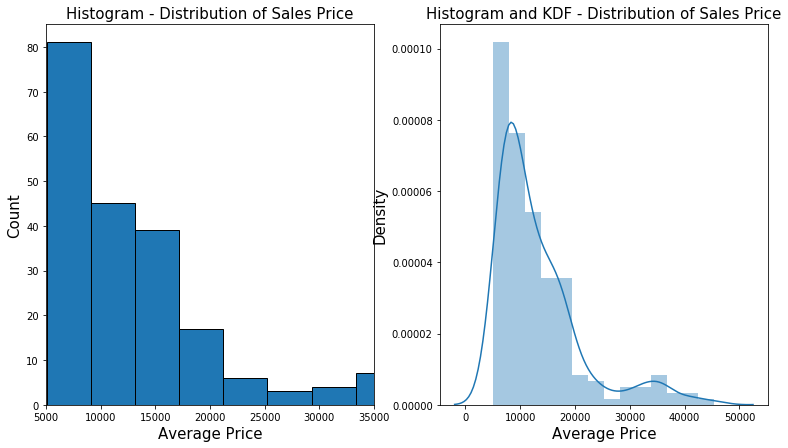

In [16]:
plt.figure(figsize=(20,7))

plt.subplot(1, 3, 1)
#auto_df.groupby(["make"])[" price "].mean().sort_values().plot("hist",bins=10,edgecolor="black")
auto_df[" price "].sort_values().plot("hist",bins=10,edgecolor="black")
plt.title("Histogram - Distribution of Sales Price",fontsize=15)
plt.xlim(5000,35000)
plt.xlabel("Average Price",fontsize=15)
plt.ylabel("Count",fontsize=15)

plt.subplot(1, 3, 2)
#sns.distplot(auto_df.groupby(["make"])[" price "].mean().sort_values())
sns.distplot(auto_df[" price "].sort_values())
plt.title("Histogram and KDF - Distribution of Sales Price",fontsize=15)
plt.ylabel("Density",fontsize=15)
plt.xlabel("Average Price",fontsize=15)

print("Skewness of target variable is: "+str(auto_df[" price "].sort_values().skew()))
print("Kurtosis of target variable is: "+str(auto_df[" price "].sort_values().skew()))

**As we see, the target variable Sale Price is highly skewed with a skewness of 1.83. This can reduce the performance of the ML regression models because some assume normal distribution. Therfore, we transform the data below via log transformation into a near-normal Distribution.**

Skewness of target variable is: 0.6677298504248596
Kurtosis of target variable is: -0.14411841804935177


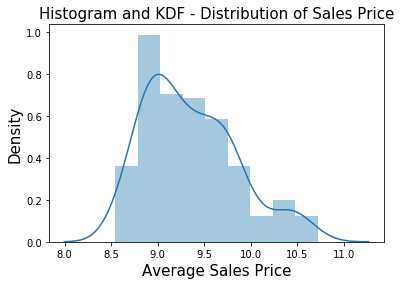

In [17]:
auto_df["price_log"]=np.log(auto_df[ " price "])

sns.distplot(auto_df["price_log"].sort_values())
plt.title("Histogram and KDF - Distribution of Sales Price",fontsize=15)
plt.ylabel("Density",fontsize=15)
plt.xlabel("Average Sales Price",fontsize=15)

print("Skewness of target variable is: "+str(auto_df["price_log"].sort_values().skew()))
print("Kurtosis of target variable is: "+str(auto_df["price_log"].sort_values().kurt()))

# 4. FEATURE TYPES 
- exploring features by splitting them between Numerical and Categorical features

In [18]:
numerical_feats = auto_df.select_dtypes(exclude="object").columns
categorical_feats = auto_df.select_dtypes(include="object").columns

print("There are "+str(len(numerical_feats))+ " numerical features")
print("-"*30)
print(numerical_feats)
print("-"*30)
print("-"*30)
print("There are "+str(len(categorical_feats))+ " categorical features")
print("-"*30)
print(categorical_feats)


There are 17 numerical features
------------------------------
Index(['symboling', 'normalized-losses', 'wheel-base', 'length', 'width',
       'height', 'curb-weight', 'engine-size', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', ' price ', 'price_log'],
      dtype='object')
------------------------------
------------------------------
There are 10 categorical features
------------------------------
Index(['make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style',
       'drive-wheels', 'engine-location', 'engine-type', 'num-of-cylinders',
       'fuel-system'],
      dtype='object')


## 4a. **NUMERICAL FEATURES** 
- a review of their distribution and correlation to Target

### **4a(1). Skewness and Kurtosis of Numerical Features**

- Skewness: measures how asymmetric the data is with a skewness of:
 1. zero if a normal distribution
 2. positive if it's skewed to the right  
 3. negative if it's skewed to the left
_______________________________________________

- Kurtosis: measures whether data is heavy or light tailed with respect to a normal distribution. A kurtosis of:
 1. zero if a normal distribution
 2. positive if the data is heavy_tailed
 3. negative if the data is light_tailed

In [19]:
for col in auto_df[numerical_feats].columns:
    print('{:25}'.format(col), 'Skewness: {:05.2f}'.format(auto_df[col].skew()) , 
          '   ' , 'Kurtosis: {:05.2f}'.format(auto_df[col].kurt()))

symboling                 Skewness: 00.21     Kurtosis: -0.68
normalized-losses         Skewness: 00.85     Kurtosis: 01.40
wheel-base                Skewness: 01.05     Kurtosis: 01.02
length                    Skewness: 00.16     Kurtosis: -0.08
width                     Skewness: 00.90     Kurtosis: 00.70
height                    Skewness: 00.06     Kurtosis: -0.44
curb-weight               Skewness: 00.68     Kurtosis: -0.04
engine-size               Skewness: 01.95     Kurtosis: 05.31
bore                      Skewness: 00.02     Kurtosis: -0.79
stroke                    Skewness: -0.69     Kurtosis: 02.17
compression-ratio         Skewness: 02.61     Kurtosis: 05.23
horsepower                Skewness: 01.40     Kurtosis: 02.68
peak-rpm                  Skewness: 00.05     Kurtosis: 00.05
city-mpg                  Skewness: 00.66     Kurtosis: 00.58
highway-mpg               Skewness: 00.54     Kurtosis: 00.44
 price                    Skewness: 01.83     Kurtosis: 03.35
price_lo

**We calculated the skewness of the features above and will look into features with a skewness of 1.25 or higher**

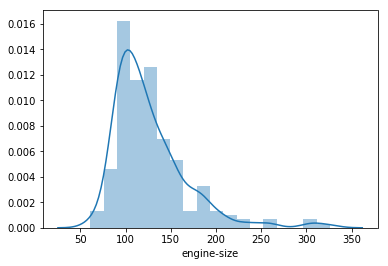

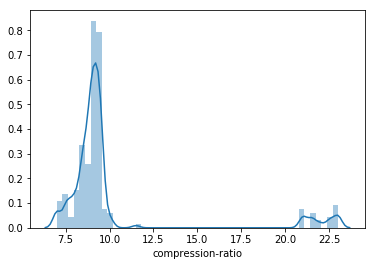

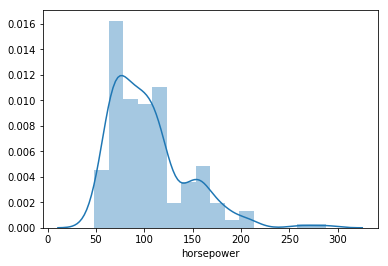

In [20]:
Highly_Skewed_Features=["engine-size","compression-ratio","horsepower"]

for feature in Highly_Skewed_Features:
    sns.distplot(auto_df[feature])
    plt.show()

**Above features are highly skewed and therefore log_transofrmed below:**

In [21]:
auto_df["engine-size_log"]=np.log(auto_df[ "engine-size"])
auto_df["compression-ratio_log"]=np.log(auto_df[ "compression-ratio"])
auto_df["horsepower_log"]=np.log(auto_df[ "horsepower"])

print('{:25}'.format("engine-size_log"), 'Skewness: {:05.2f}'.format(auto_df["engine-size_log"].skew()),  '   ' , 'Kurtosis: {:05.2f}'.format(auto_df["engine-size_log"].kurt()))
print("{:25}".format("compression-ratio_log"), "Skewness: {:05.2f}".format(auto_df["compression-ratio_log"].skew()),'    ''Kurtosis: {:05.2f}'.format(auto_df["compression-ratio_log"].kurt()))#,'{}'.format.(auto_df["compression-ratio_log"].kurt()))
print('{:25}'.format("horsepower_log"), 'Skewness: {:05.2f}'   .format(auto_df["horsepower_log"].skew()) ,'   ', 'Kurtosis: {:05.2f}'   .format(auto_df["horsepower_log"].kurt()))

auto_df=auto_df.drop(["engine-size","compression-ratio","horsepower"],axis=1)

engine-size_log           Skewness: 00.86     Kurtosis: 01.01
compression-ratio_log     Skewness: 02.35     Kurtosis: 04.46
horsepower_log            Skewness: 00.47     Kurtosis: -0.27


### **4a(2). Correlation of Numerical Features to Target**

In [22]:
numerical_feats=auto_df.select_dtypes(exclude="object").columns

**Scatter Plots of all Numerical Features**

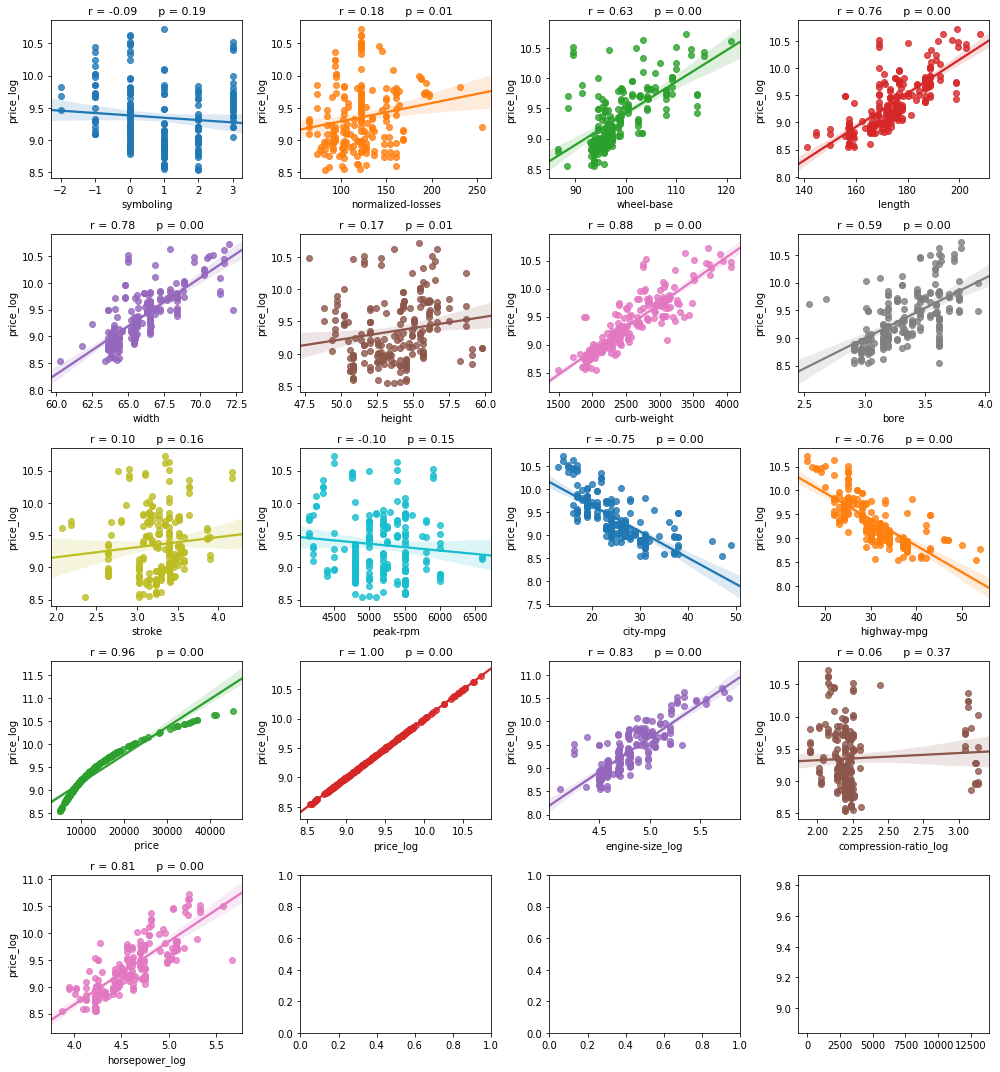

In [23]:
nr_rows = 5
nr_cols = 4

fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*3.5,nr_rows*3))

for r in range(0,nr_rows):
    for c in range(0,nr_cols):  
        i = r*nr_cols+c
        if i < len(numerical_feats):
            sns.regplot(auto_df[numerical_feats[i]], auto_df["price_log"], ax = axs[r][c])
            stp = stats.pearsonr(auto_df[numerical_feats[i]], auto_df["price_log"])
            str_title = "r = " + "{0:.2f}".format(stp[0]) + "      " "p = " + "{0:.2f}".format(stp[1])
            axs[r][c].set_title(str_title,fontsize=11)
            
plt.tight_layout()    
plt.show()   

**Heatmap of all Numerical Features**

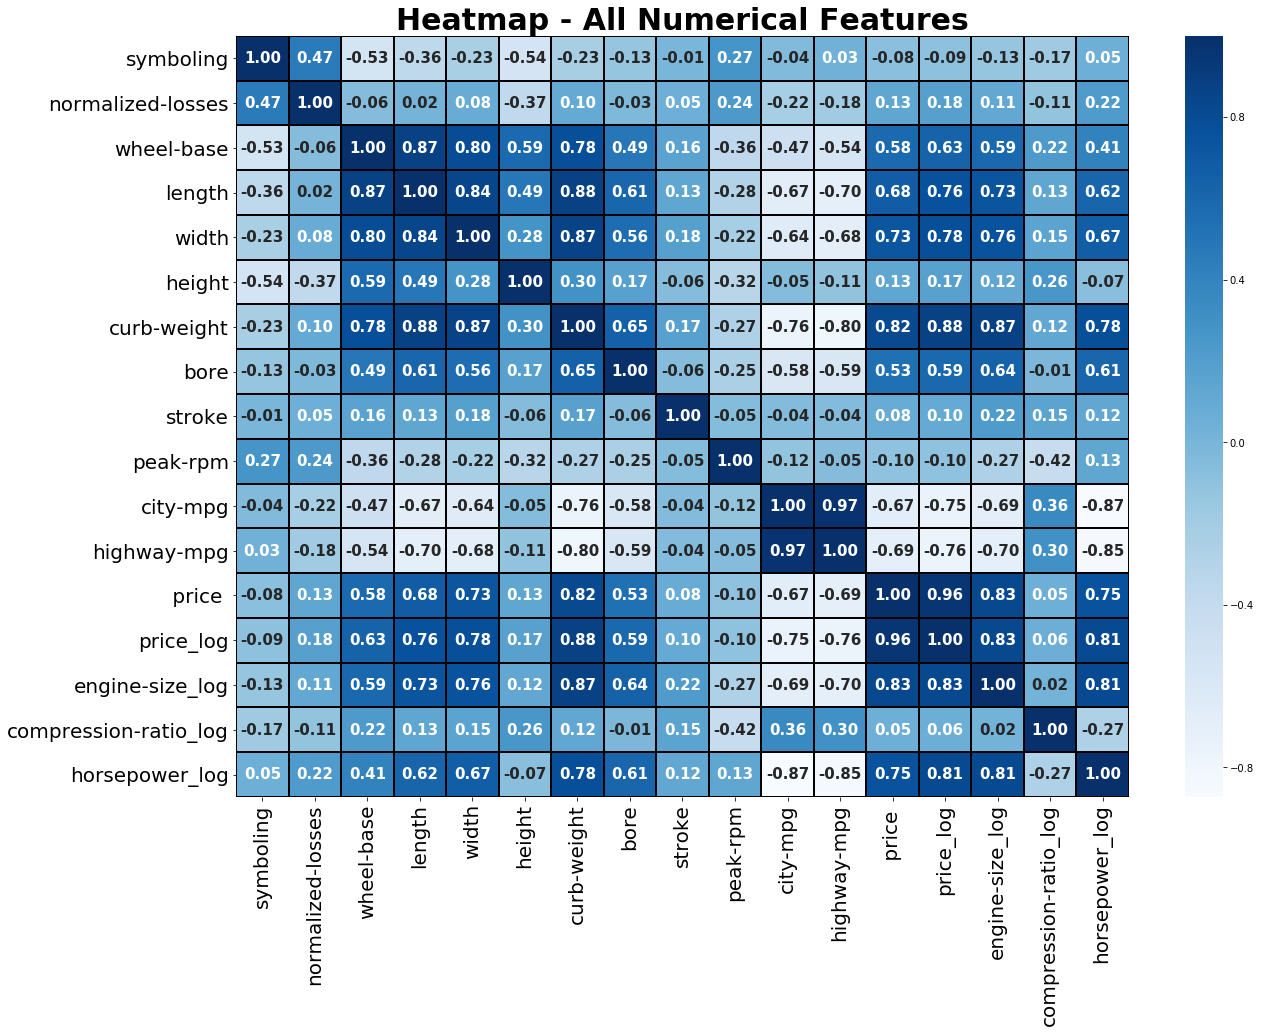

In [24]:
corr_df=auto_df[numerical_feats].corr()

plt.figure(figsize=(20,14))
sns.heatmap(corr_df,annot=True,edgecolor="black",linewidth=1,linecolor="black",cbar=True,cmap="Blues",fmt=".2f",annot_kws={'size': 15,"fontweight":"bold"}).tick_params(labelsize=20)
plt.title("Heatmap - All Numerical Features",fontsize=30, fontweight="bold")
plt.show()

### 4a(3). Bifurcation of Highly/Moderately Correlation Numerical Features and Lowly Correlated Numerical Features

In [25]:
Correlation_threshold=.40

Corr_Num_Features=corr_df["price_log"].abs().sort_values(ascending=False)
Highly_Moderately_Corr_Num_Features=corr_df["price_log"].abs().sort_values(ascending=False).where(corr_df["price_log"].abs().sort_values(ascending=False)>Correlation_threshold).dropna(how=any)
Lowly_Corr_Num_Features=corr_df["price_log"].abs().sort_values(ascending=False).where(corr_df["price_log"].abs().sort_values(ascending=False)<Correlation_threshold).dropna(how=any)

print("*"*50)
print("There are "+str(len(Corr_Num_Features)) + " Correlated Numerical Features:")
print("*"*50)
print(Corr_Num_Features)
print("*"*50)
print("There are "+str(len(Highly_Moderately_Corr_Num_Features)) + " Highly/Moderately Correlated Numerical Features:")
print("*"*50)
print(Highly_Moderately_Corr_Num_Features)
print("*"*50)
print("There are "+str(len(Lowly_Corr_Num_Features)) + " Lowly Correlated Numerical Features:")
print("*"*50)
print(Lowly_Corr_Num_Features)

**************************************************
There are 17 Correlated Numerical Features:
**************************************************
price_log                1.000000
 price                   0.956159
curb-weight              0.876231
engine-size_log          0.831690
horsepower_log           0.813225
width                    0.775928
length                   0.763799
highway-mpg              0.763798
city-mpg                 0.751098
wheel-base               0.631824
bore                     0.592491
normalized-losses        0.180423
height                   0.172697
peak-rpm                 0.101339
stroke                   0.098202
symboling                0.091032
compression-ratio_log    0.063018
Name: price_log, dtype: float64
**************************************************
There are 11 Highly/Moderately Correlated Numerical Features:
**************************************************
price_log          1.000000
 price             0.956159
curb-weight        0.876

**Below is a matrix of all the Highly_Moderately Correlated Numerical Features. Some of the features with the highest correlation to Price may also be correlated to each other. To avoid multicollinearlity, these features will be dropped for prediction purposes.**

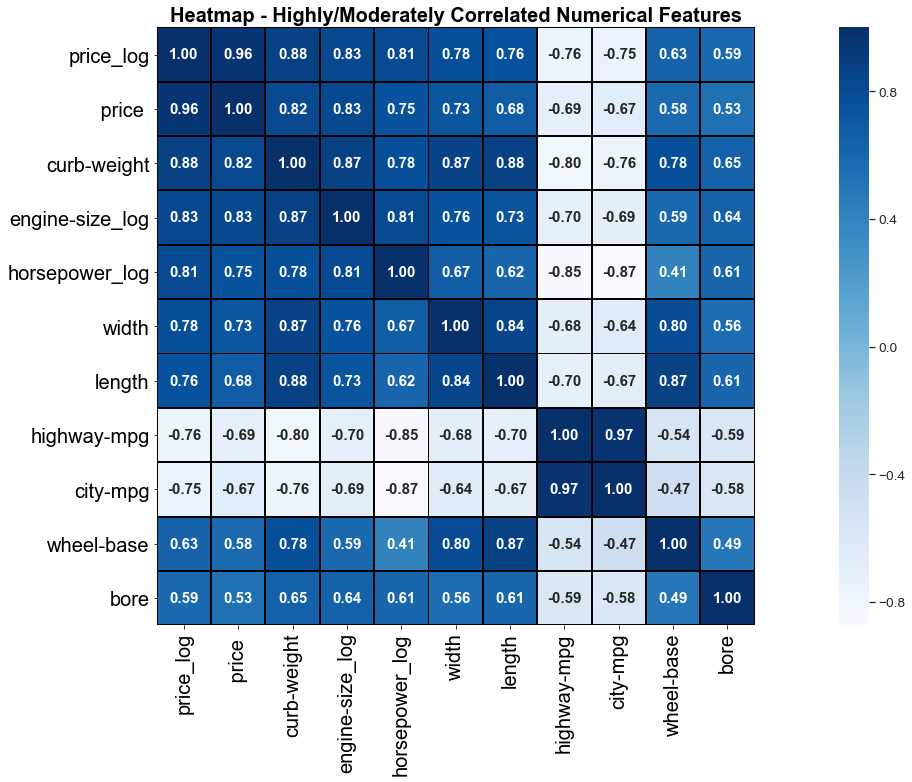

In [26]:
numpy_t=auto_df[Highly_Moderately_Corr_Num_Features.index].values.T
cm1 = np.corrcoef(numpy_t) 

nr_feats = len(Highly_Moderately_Corr_Num_Features.index)

plt.figure(figsize=(nr_feats*2.75, nr_feats*1.00))
plt.xticks(rotation='vertical')
plt.yticks(rotation='vertical')
sns.set(font_scale=1.25)
sns.heatmap(cm1,annot=True, edgecolor="black", linewidths=1, linecolor="black", cbar=True, cmap="Blues",  square=True, fmt='.2f', annot_kws={'size': 15,"fontweight":"bold"}, yticklabels=Highly_Moderately_Corr_Num_Features.index, xticklabels=Highly_Moderately_Corr_Num_Features.index).tick_params(labelsize=20)
plt.title("Heatmap - Highly/Moderately Correlated Numerical Features",fontsize=20, fontweight="bold")
plt.show()

### **Conclusion from EDA on numerical columns:**

We see that for some features like 'horsepower_log',"engine-size_log", and 'highway-mpg', there is a strong linear correlation of .81,.83 and .76 to the Price.

For other features like 'Compression-ratio_log' the correlation is very weak.
For this exercises, we decided to use only those features for prediction that have a correlation larger than .4.

Features with less than a .4 correlation will be dropped for prediciton purposes.

## 4b. **CATEGORICAL FEATURES**
- a review of their unique values and their relationship to Price

### **4b(1). Review of Categorical Features to check for reasonableness of contents - using value_counts**

In [27]:
for catg in auto_df[categorical_feats].columns:
    print (auto_df[catg].value_counts())
    print ("*"*25)
    


toyota           32
nissan           18
mazda            17
honda            13
mitsubishi       13
volkswagen       12
subaru           12
volvo            11
peugot           11
dodge             9
mercedes-benz     8
bmw               8
audi              7
plymouth          7
saab              6
porsche           5
isuzu             4
chevrolet         3
alfa-romero       3
jaguar            3
renault           2
mercury           1
Name: make, dtype: int64
*************************
gas       185
diesel     20
Name: fuel-type, dtype: int64
*************************
std      168
turbo     37
Name: aspiration, dtype: int64
*************************
four    116
two      89
Name: num-of-doors, dtype: int64
*************************
sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: body-style, dtype: int64
*************************
fwd    120
rwd     76
4wd      9
Name: drive-wheels, dtype: int64
*************************
front    202
rear   

### **4b(1a).  Visual depiction of value_counts from above of Categorical Features - using countplots**

- "make" feature is plotted seperately due to its size and then the rest of the categorical features are plotted through subplots

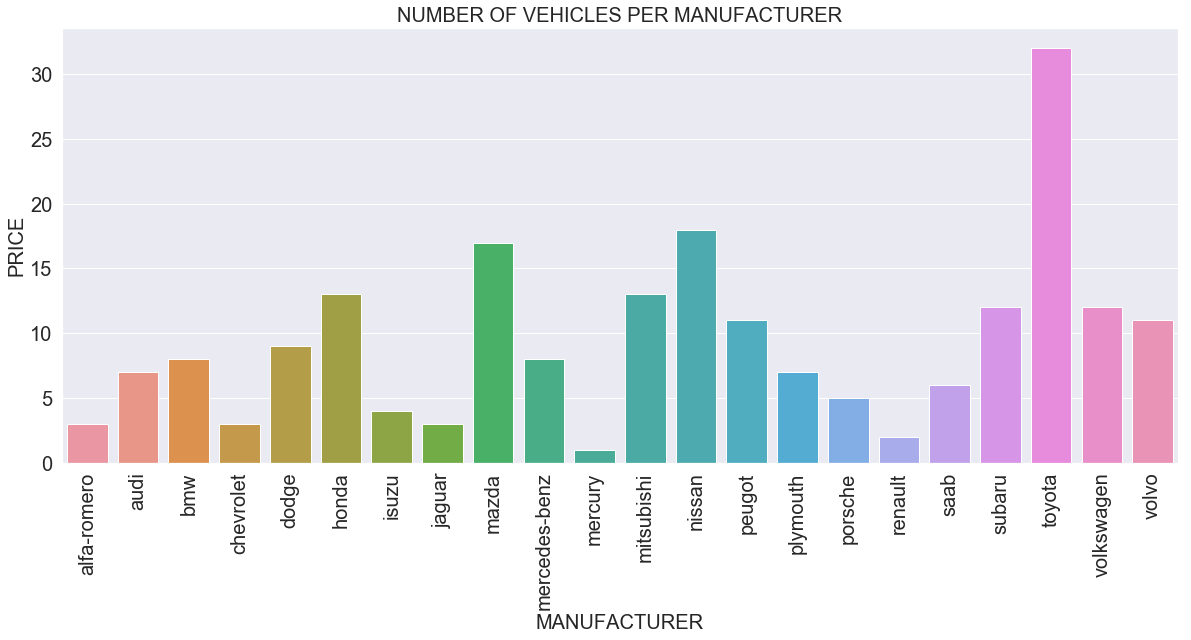

In [28]:
plt.figure(figsize=(20,8))
sns.countplot("make", data=auto_df).tick_params(labelsize=20) #0,0 plot above
plt.xticks(rotation='vertical')
plt.xlabel("MANUFACTURER",fontsize=20)
plt.ylabel("PRICE",fontsize=20)
plt.title("NUMBER OF VEHICLES PER MANUFACTURER",fontsize=20)
plt.show()

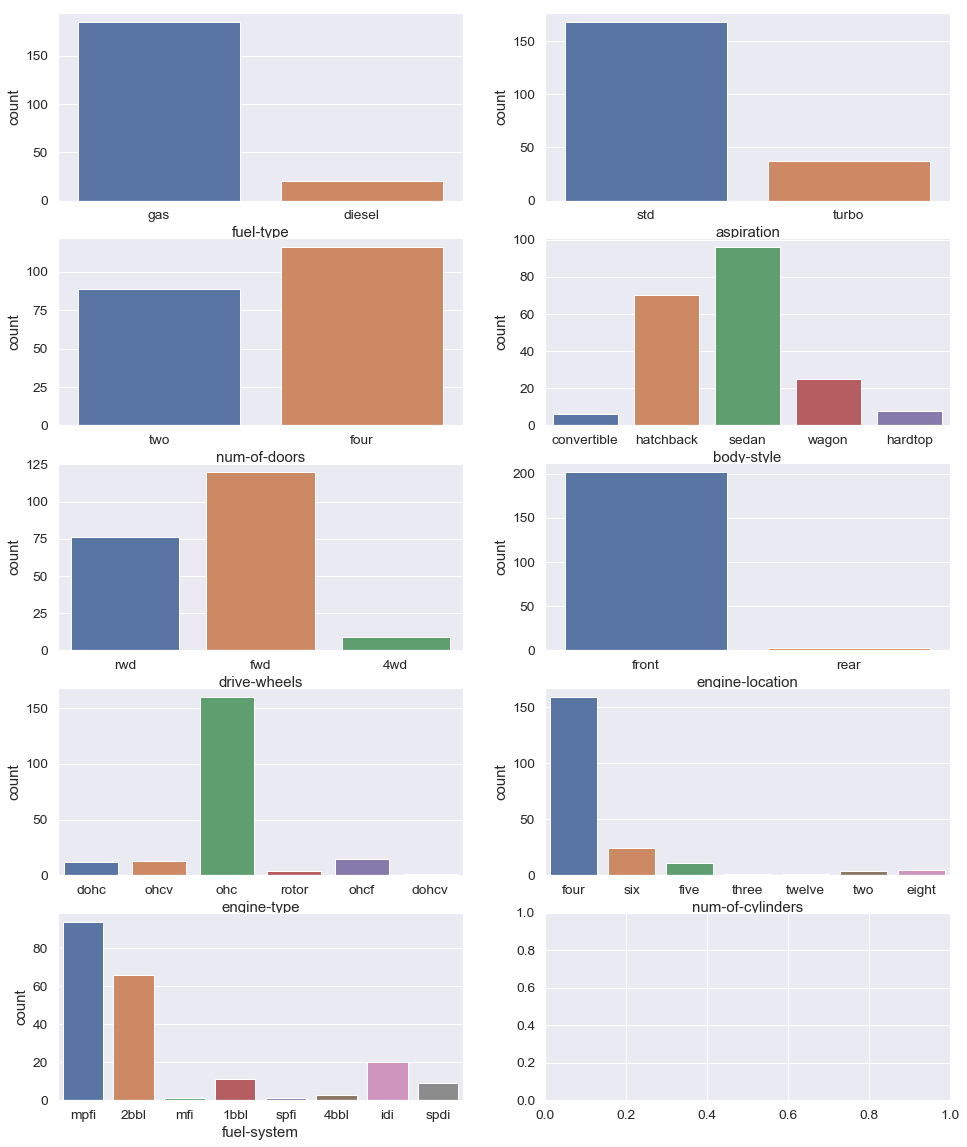

In [29]:
li_cat_feats = list(categorical_feats)
li_not_plot = ['make']
li_plot_cat_feats = [c for c in li_cat_feats if c not in li_not_plot]

nr_rows = 5
nr_cols = 2

fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*8,nr_rows*4))

for r in range(0,nr_rows):
    for c in range(0,nr_cols):
        i=r*nr_cols+c               #index
        if i<len(li_plot_cat_feats):
            sns.countplot(li_plot_cat_feats[i], data=auto_df, ax = axs[r][c])

### **4b(2). Visual Depiction of the range of Target per Category Feature - using boxplots.**  
- "make" feature is plotted seperately due to its size and then the rest of the categorical features are plotted through subplots

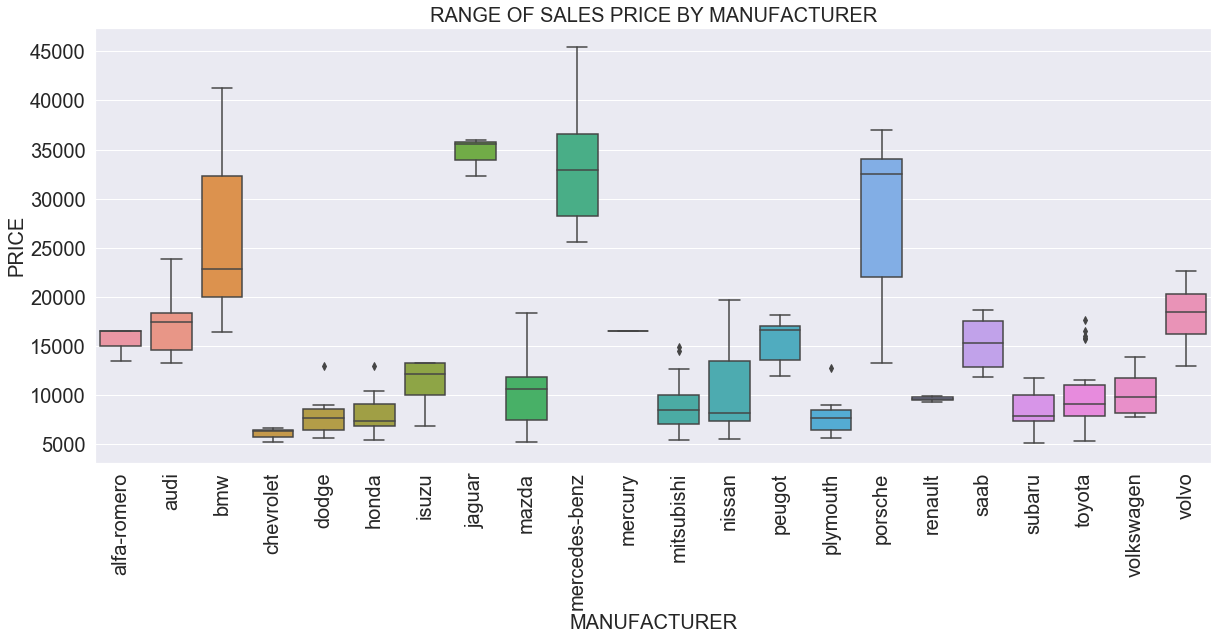

In [30]:
plt.figure(figsize=(20,8))
sns.boxplot(x=auto_df["make"], y=auto_df[" price "], data=auto_df).tick_params(labelsize=20) #0,0 plot above
plt.xticks(rotation='vertical')
plt.xlabel("MANUFACTURER",fontsize=20)
plt.ylabel("PRICE",fontsize=20)
plt.title("RANGE OF SALES PRICE BY MANUFACTURER",fontsize=20)
plt.show()

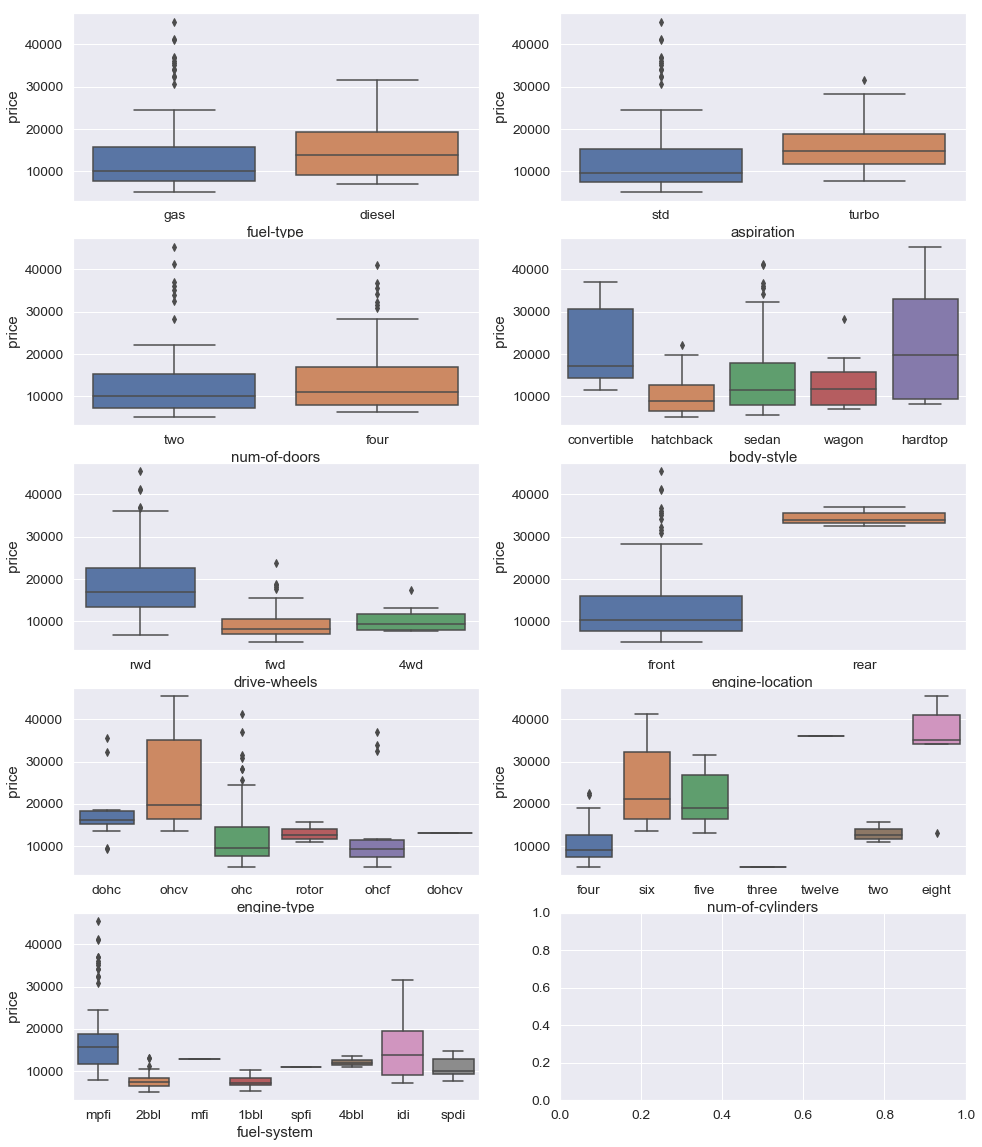

In [31]:
li_cat_feats = list(categorical_feats)
li_not_plot = ['make']
li_plot_cat_feats = [c for c in li_cat_feats if c not in li_not_plot]

nr_rows = 5
nr_cols = 2

fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*8,nr_rows*4))

for r in range(0,nr_rows):
    for c in range(0,nr_cols):
        i=r*nr_cols+c               #index
        if i<len(li_plot_cat_feats):
            sns.boxplot(x=li_plot_cat_feats[i], y=auto_df[" price "], data=auto_df, ax = axs[r][c])

### **Conclusion from EDA on categorical columns:**

Of the ten or so Categorical features, we found half of them to have no relationship with the Sales Price. The five features that we did deem to have a relationship with the Sales Prices are as follows:
    
"make","drive-wheels","engine-type","number-of-cylinders","fuel-system".The other features will be dropped off for prediction purposes.

In [32]:
Highly_Corr_Cat_Features=auto_df[["make","drive-wheels","engine-type","num-of-cylinders","fuel-system"]].columns
Lowly_Corr_Cat_Features=auto_df[categorical_feats].drop(Highly_Corr_Cat_Features,axis=1).columns

print("*"*50)
print("There are " + str(len(Highly_Corr_Cat_Features)) + " Highly_Corr_Cat_Features:")
print("*"*50)
print(Highly_Corr_Cat_Features)
print("*"*50)
print("*"*50)
print("There are " + str(len(Lowly_Corr_Cat_Features)) + " Lowly_Corr_Cat_Features:")
print("*"*50)
print(Lowly_Corr_Cat_Features)

**************************************************
There are 5 Highly_Corr_Cat_Features:
**************************************************
Index(['make', 'drive-wheels', 'engine-type', 'num-of-cylinders',
       'fuel-system'],
      dtype='object')
**************************************************
**************************************************
There are 5 Lowly_Corr_Cat_Features:
**************************************************
Index(['fuel-type', 'aspiration', 'num-of-doors', 'body-style',
       'engine-location'],
      dtype='object')


### **4b(3). Visual Depiction of the distribution of Target per Highly_Correlated Category Feature - using violinplots.**   
- "make" feature is plotted seperately due to its size and then the rest of the categorical features are plotted through subplots

Text(0.5, 0, 'MANUFACTURER')

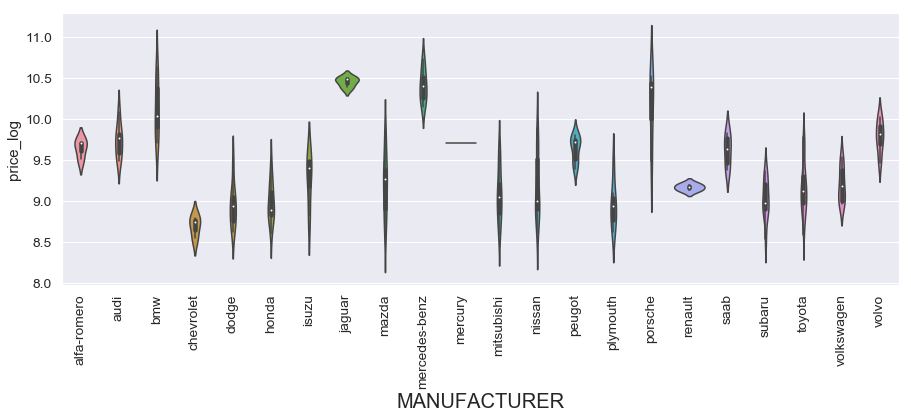

In [33]:
plt.figure(figsize=(15,5))
sns.violinplot(x=auto_df["make"],y=auto_df["price_log"],data=auto_df)
plt.xticks(rotation='vertical')
plt.xlabel("MANUFACTURER",fontsize=20)

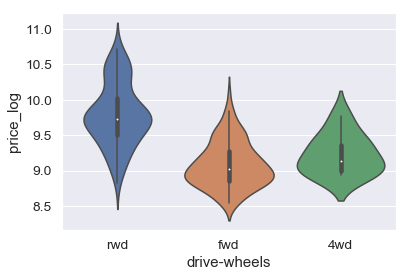

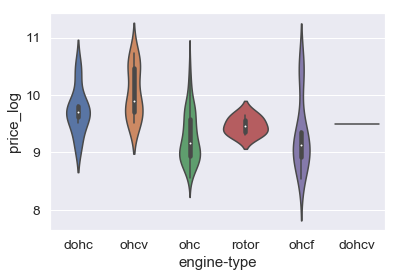

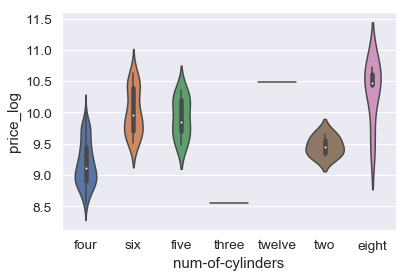

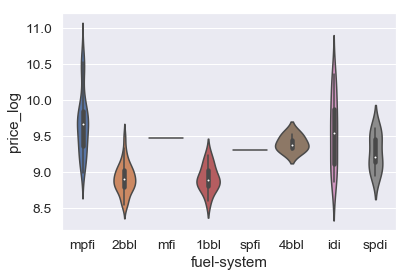

In [34]:
li_not_plot = ['make']
Highly_Corr_Cat_Features_wo_Make = [c for c in Highly_Corr_Cat_Features if c not in li_not_plot]

for catg in Highly_Corr_Cat_Features_wo_Make:
    sns.violinplot(x=auto_df[catg],y=auto_df["price_log"],data=auto_df)
    plt.show()


### **4b(4). Review of Average Price as it relates to Highly_Correlated Categorical Features.**  

In [35]:
for catg in Highly_Corr_Cat_Features:
    print (auto_df.groupby(catg)["price_log"].mean())
    print ("*"*25)

make
alfa-romero       9.644102
audi              9.734518
bmw              10.117372
chevrolet         8.695162
dodge             8.941246
honda             8.982928
isuzu             9.277375
jaguar           10.450414
mazda             9.209076
mercedes-benz    10.406528
mercury           9.711297
mitsubishi        9.084226
nissan            9.173402
peugot            9.637771
plymouth          8.948656
porsche          10.166471
renault           9.168508
saab              9.615490
subaru            9.028109
toyota            9.153631
volkswagen        9.197518
volvo             9.785692
Name: price_log, dtype: float64
*************************
drive-wheels
4wd    9.229043
fwd    9.084480
rwd    9.791160
Name: price_log, dtype: float64
*************************
engine-type
dohc      9.728366
dohcv     9.488512
ohc       9.269221
ohcf      9.312102
ohcv     10.037075
rotor     9.464834
Name: price_log, dtype: float64
*************************
num-of-cylinders
eight     10.347269
fiv

### 4b(4a). Visual Depiction of the Average Target per Highly Correlated Category Feature
- "make" feature is plotted seperately due to its size and then the rest of the categorical features are plotted through subplots

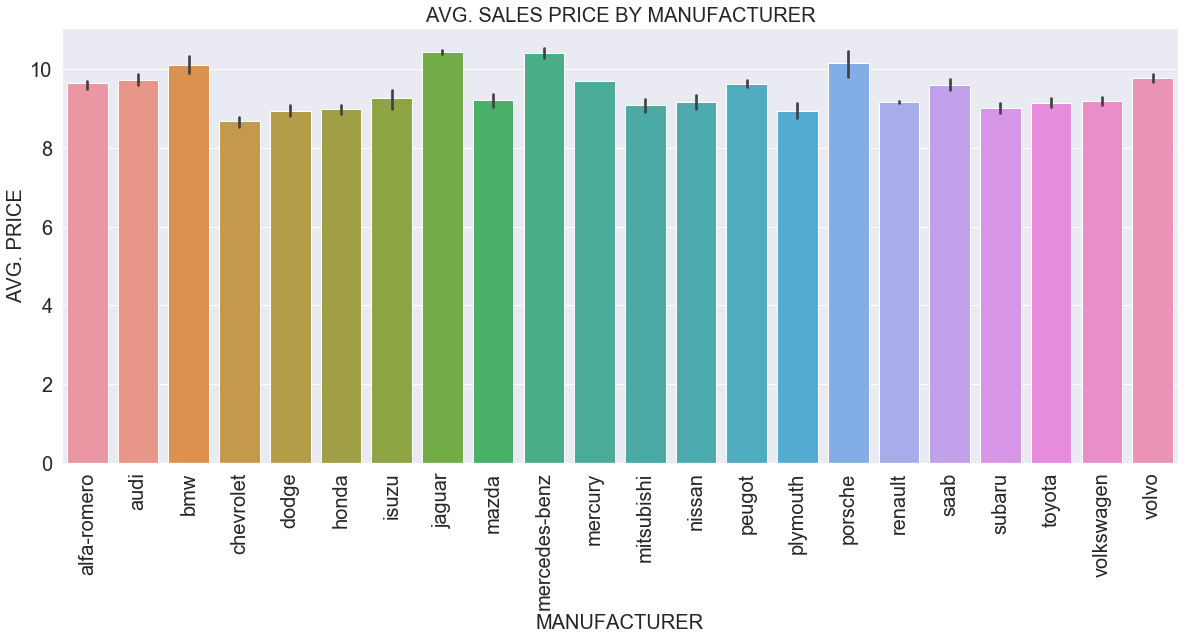

In [36]:
plt.figure(figsize=(20,8))
sns.barplot(x=auto_df["make"], y=auto_df["price_log"], data=auto_df).tick_params(labelsize=20) #0,0 plot above
plt.xticks(rotation='vertical')
plt.xlabel("MANUFACTURER",fontsize=20)
plt.ylabel("AVG. PRICE",fontsize=20)
plt.title("AVG. SALES PRICE BY MANUFACTURER",fontsize=20)
plt.show()

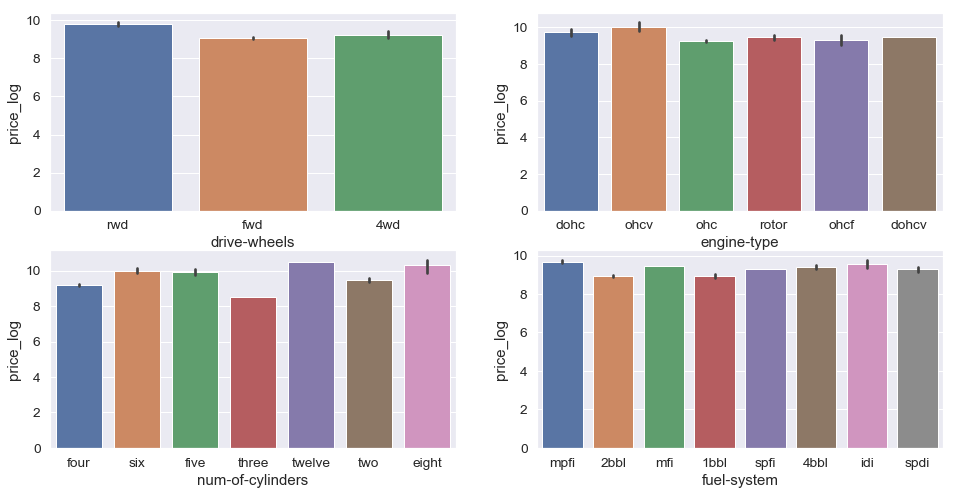

In [37]:
li_cat_feats = list(Highly_Corr_Cat_Features)
li_plot_cat_feats=["make"]
li_cat_feats_wo_Make=[c for c in li_cat_feats if c not in li_plot_cat_feats]

nr_rows = 2
nr_cols = 2

fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*8,nr_rows*4))

for r in range(0,nr_rows):
    for c in range(0,nr_cols):
        i=r*nr_cols+c
        if i<len(li_cat_feats_wo_Make):
            sns.barplot(x=li_cat_feats_wo_Make[i], y=auto_df["price_log"], data=auto_df, ax = axs[r][c])


### 4b(5). Converting Highly Related Categorical Features to Numerical

In [38]:
#Highly Correlated Consolidated DF
auto_corr_df=auto_df.drop(Lowly_Corr_Cat_Features,axis=1).drop(Lowly_Corr_Num_Features.index,axis=1) 

In [39]:
#Converting Categorical features from above Dataframe into numerical ones

auto_corr_cat_conv_df=pd.get_dummies(auto_corr_df,columns=Highly_Corr_Cat_Features,drop_first=True)
auto_corr_cat_conv_df.shape

(205, 52)

**Scatter Plots of Newly Converted Numerical Features (originally Categorical Feature)**

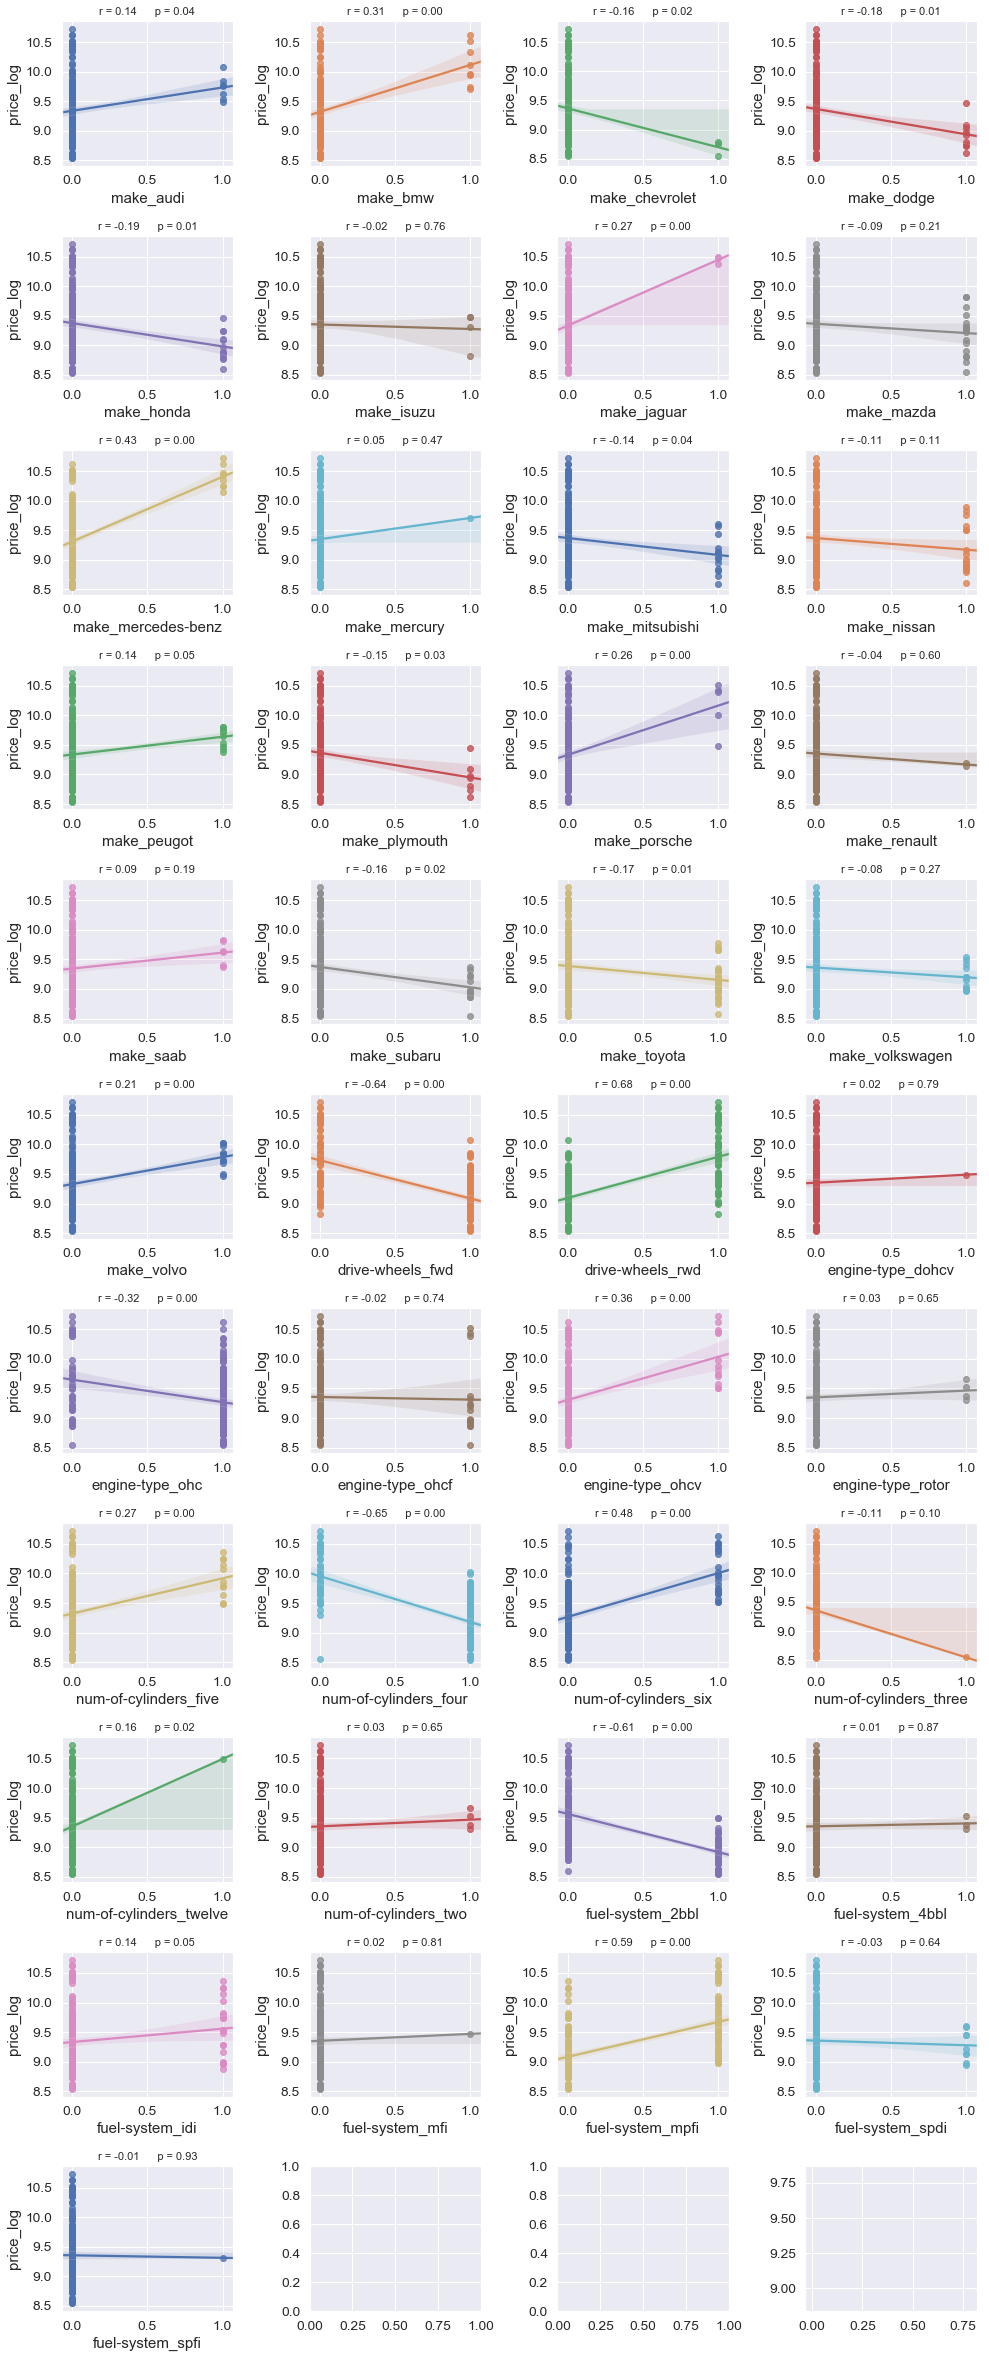

In [40]:
Categorical_columns=auto_corr_cat_conv_df.columns[11:]

nr_rows = 11
nr_cols = 4

fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*3.5,nr_rows*3))

for r in range(0,nr_rows):
    for c in range(0,nr_cols):  
        i = r*nr_cols+c
        if i < len(Categorical_columns):
            sns.regplot(auto_corr_cat_conv_df[Categorical_columns[i]], auto_corr_cat_conv_df["price_log"], ax = axs[r][c])
            stp = stats.pearsonr(auto_corr_cat_conv_df[Categorical_columns[i]], auto_corr_cat_conv_df["price_log"])
            str_title = "r = " + "{0:.2f}".format(stp[0]) + "      " "p = " + "{0:.2f}".format(stp[1])
            axs[r][c].set_title(str_title,fontsize=11)
            
plt.tight_layout()    
plt.show()   

# 5. **Final DataFrame - before multi-collinearity considerations**

In [41]:

print(auto_corr_cat_conv_df.shape)
auto_corr_cat_conv_df.head()

(205, 52)


,wheel-base,length,width,curb-weight,bore,city-mpg,highway-mpg,price,price_log,engine-size_log,horsepower_log,make_audi,make_bmw,make_chevrolet,make_dodge,make_honda,make_isuzu,make_jaguar,make_mazda,make_mercedes-benz,make_mercury,make_mitsubishi,make_nissan,make_peugot,make_plymouth,make_porsche,make_renault,make_saab,make_subaru,make_toyota,make_volkswagen,make_volvo,drive-wheels_fwd,drive-wheels_rwd,engine-type_dohcv,engine-type_ohc,engine-type_ohcf,engine-type_ohcv,engine-type_rotor,num-of-cylinders_five,num-of-cylinders_four,num-of-cylinders_six,num-of-cylinders_three,num-of-cylinders_twelve,num-of-cylinders_two,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
0,88.6,168.8,64.1,2548,3.47,21,27,13495.0,9.510075,4.867534,4.709530,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
1,88.6,168.8,64.1,2548,3.47,21,27,16500.0,9.711116,4.867534,4.709530,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
2,94.5,171.2,65.5,2823,2.68,19,26,16500.0,9.711116,5.023881,5.036953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0
3,99.8,176.6,66.2,2337,3.19,24,30,13950.0,9.543235,4.691348,4.624973,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
4,99.4,176.6,66.4,2824,3.19,18,22,17450.0,9.767095,4.912655,4.744932,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0


## 5a. Correlation to Target

In [42]:
Correlation_threshold=.4

Corr_All_Features=auto_corr_cat_conv_df.corr().abs()["price_log"].sort_values(ascending=False)
Highly_Moderately_Corr_Features=auto_corr_cat_conv_df.corr().abs()["price_log"].sort_values(ascending=False).where(auto_corr_cat_conv_df.corr().abs()["price_log"].sort_values(ascending=False)>Correlation_threshold).dropna(how=any)
Lowly_Corr_Features=auto_corr_cat_conv_df.corr().abs()["price_log"].sort_values(ascending=False).where(auto_corr_cat_conv_df.corr().abs()["price_log"].sort_values(ascending=False)<Correlation_threshold).dropna(how=any)

print("*"*50)
print("There are "+str(len(Corr_All_Features)) + " Corr_All_Features:")
print("*"*50)
print(Corr_All_Features)
print("*"*50)
print("There are "+str(len(Highly_Moderately_Corr_Features)) + " Highly_Moderately_Corr_Features (>.4 correlation):")
print("*"*50)
print(Highly_Moderately_Corr_Features)
print("*"*50)
print("There are "+str(len(Lowly_Corr_Features)) + " Lowly_Corr_Features:")
print("*"*50)
print(Lowly_Corr_Features)

**************************************************
There are 52 Corr_All_Features:
**************************************************
price_log                  1.000000
 price                     0.956159
curb-weight                0.876231
engine-size_log            0.831690
horsepower_log             0.813225
width                      0.775928
length                     0.763799
highway-mpg                0.763798
city-mpg                   0.751098
drive-wheels_rwd           0.677712
num-of-cylinders_four      0.652058
drive-wheels_fwd           0.642210
wheel-base                 0.631824
fuel-system_2bbl           0.607793
fuel-system_mpfi           0.593354
bore                       0.592491
num-of-cylinders_six       0.480278
make_mercedes-benz         0.427712
engine-type_ohcv           0.358641
engine-type_ohc            0.317502
make_bmw                   0.310341
num-of-cylinders_five      0.271080
make_jaguar                0.269430
make_porsche               0.259136
ma

## 5b. Heatmap of Correlated Features 

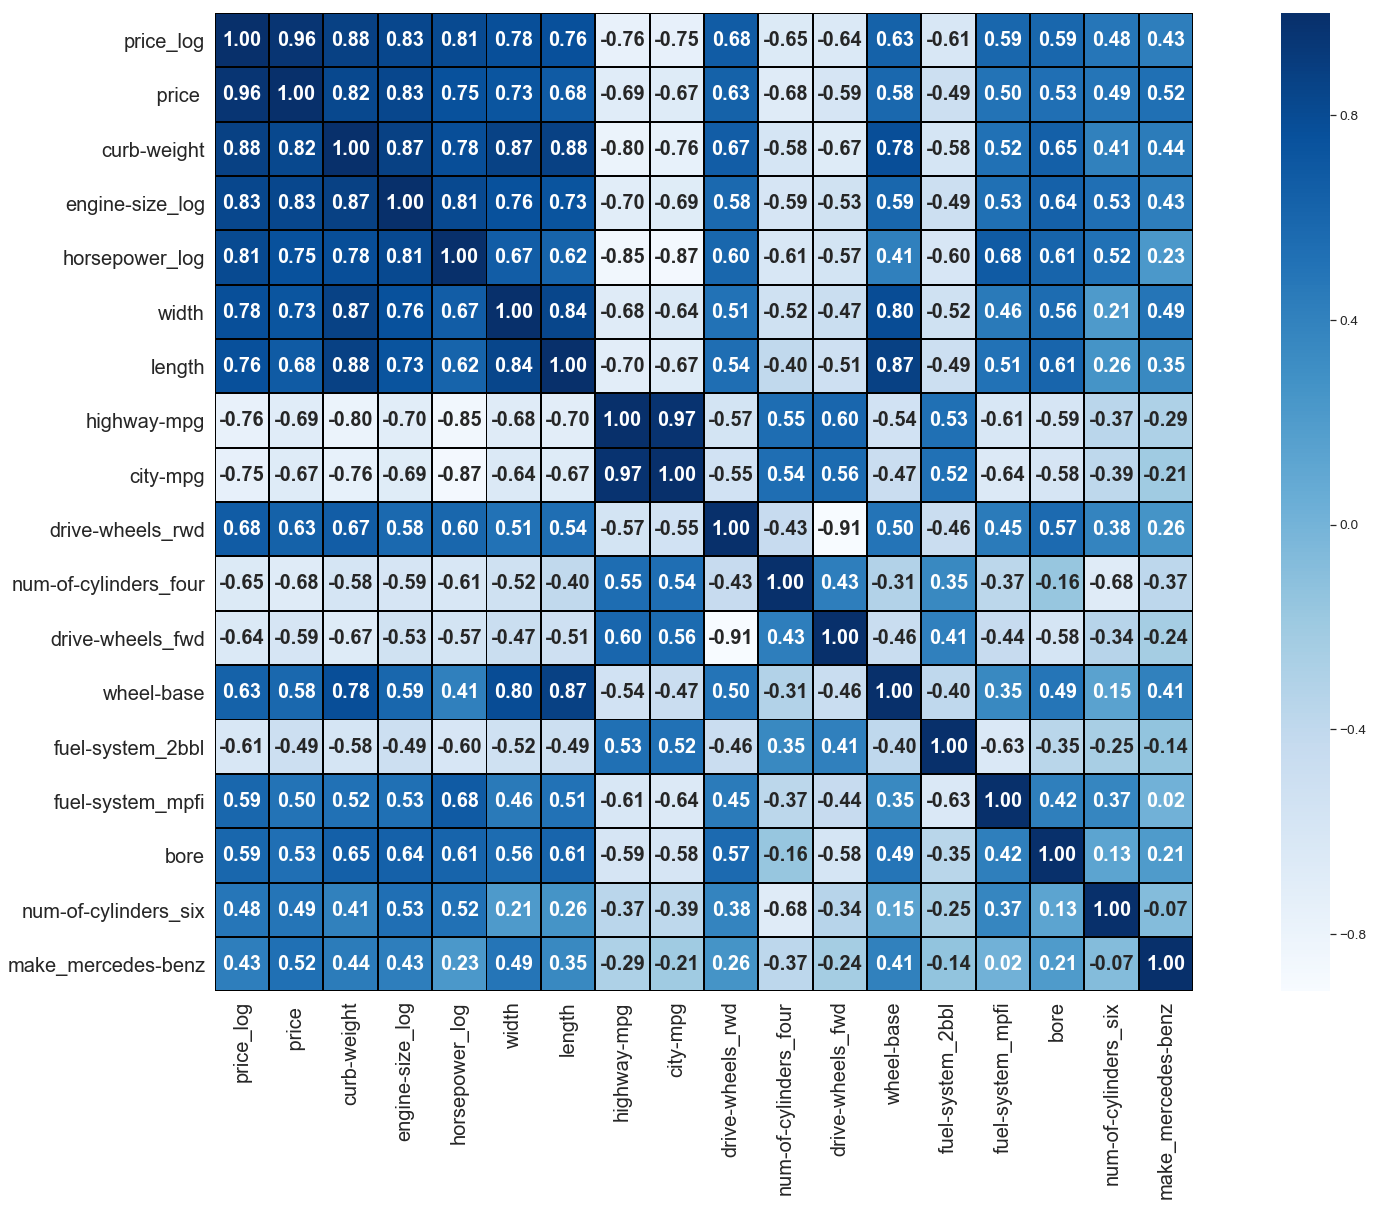

In [43]:
numpy_1=auto_corr_cat_conv_df[Highly_Moderately_Corr_Features.index].values.T
cm2 = np.corrcoef(numpy_1) 

nr_feats = len(Highly_Moderately_Corr_Features.index)

plt.figure(figsize=(nr_feats*1.75, nr_feats*1.00))
plt.xticks(rotation='vertical')
plt.yticks(rotation='vertical')
sns.set(font_scale=1.25)
sns.heatmap(cm2,annot=True, edgecolor="black", linewidths=1, linecolor="black", cbar=True, cmap="Blues",  square=True, fmt='.2f', annot_kws={'size': 20,"fontweight":"bold"}, yticklabels=Highly_Moderately_Corr_Features.index, xticklabels=Highly_Moderately_Corr_Features.index).tick_params(labelsize=20)
plt.show()




# 6. **Features Used For RF/DT Models** 
- W/O regards to multicollinearity

In [44]:
#RF_DT_Dataset_df=Regression_Dataset_df=auto_corr_cat_conv_df[Highly_Moderately_Corr_Features.index].drop([' price ','price_log'],axis=1)
RF_DT_Dataset_df=Regression_Dataset_df=auto_corr_cat_conv_df.drop([' price ','price_log'],axis=1)

print(RF_DT_Dataset_df.shape)
RF_DT_Dataset_df.head()

(205, 50)


,wheel-base,length,width,curb-weight,bore,city-mpg,highway-mpg,engine-size_log,horsepower_log,make_audi,make_bmw,make_chevrolet,make_dodge,make_honda,make_isuzu,make_jaguar,make_mazda,make_mercedes-benz,make_mercury,make_mitsubishi,make_nissan,make_peugot,make_plymouth,make_porsche,make_renault,make_saab,make_subaru,make_toyota,make_volkswagen,make_volvo,drive-wheels_fwd,drive-wheels_rwd,engine-type_dohcv,engine-type_ohc,engine-type_ohcf,engine-type_ohcv,engine-type_rotor,num-of-cylinders_five,num-of-cylinders_four,num-of-cylinders_six,num-of-cylinders_three,num-of-cylinders_twelve,num-of-cylinders_two,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
0,88.6,168.8,64.1,2548,3.47,21,27,4.867534,4.709530,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
1,88.6,168.8,64.1,2548,3.47,21,27,4.867534,4.709530,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
2,94.5,171.2,65.5,2823,2.68,19,26,5.023881,5.036953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0
3,99.8,176.6,66.2,2337,3.19,24,30,4.691348,4.624973,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
4,99.4,176.6,66.4,2824,3.19,18,22,4.912655,4.744932,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0


# 7. **Features Used For Regression Models** 
 - Multicollinearity Check - drop features with a correlation of greater than .7

In [45]:
Dropped_Features=[' price ','price_log','curb-weight','engine-size_log', 'horsepower_log','width','length','city-mpg','drive-wheels_fwd']

Regression_Dataset_df=auto_corr_cat_conv_df[Highly_Moderately_Corr_Features.index].drop(Dropped_Features,axis=1)

print(Regression_Dataset_df.shape)
Regression_Dataset_df.head()

(205, 9)


,highway-mpg,drive-wheels_rwd,num-of-cylinders_four,wheel-base,fuel-system_2bbl,fuel-system_mpfi,bore,num-of-cylinders_six,make_mercedes-benz
0,27,1,1,88.6,0,1,3.47,0,0
1,27,1,1,88.6,0,1,3.47,0,0
2,26,1,0,94.5,0,1,2.68,1,0
3,30,0,1,99.8,0,1,3.19,0,0
4,22,0,0,99.4,0,1,3.19,0,0


**Regression Model Dataset Heatmap**

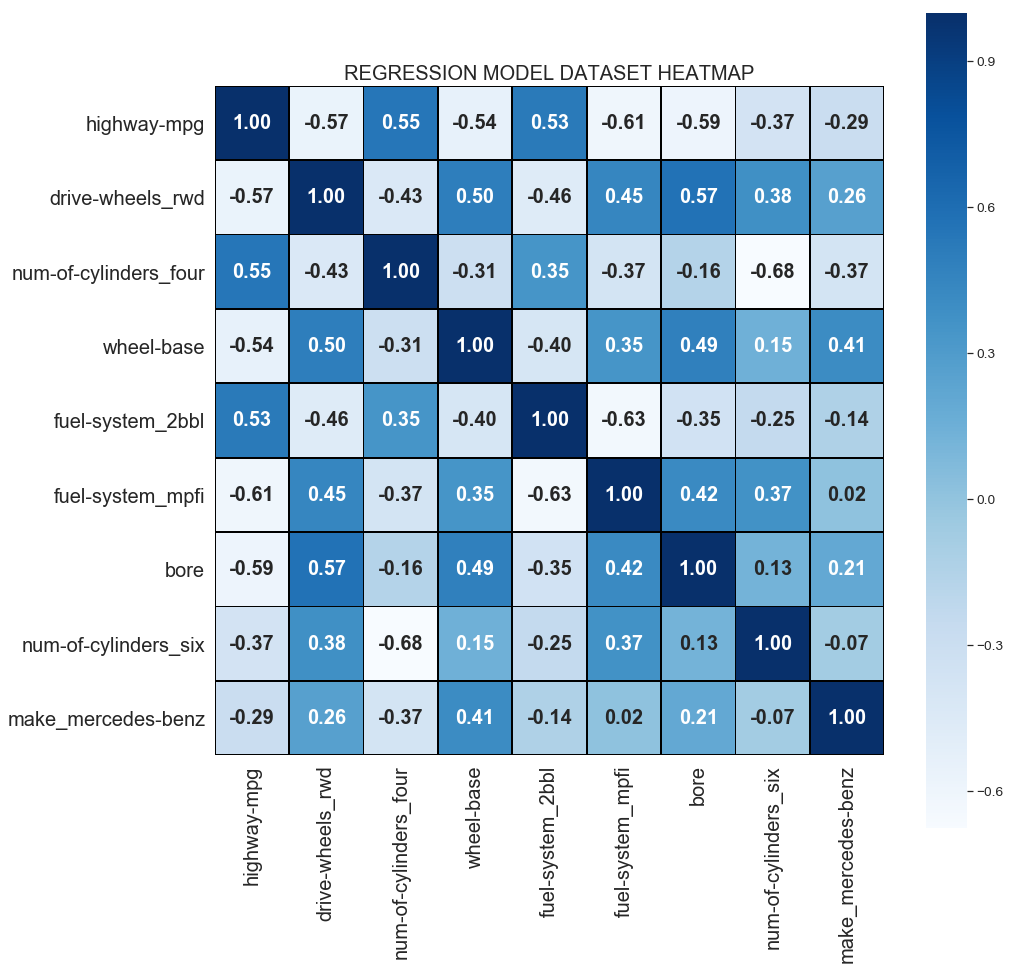

In [46]:
nr_cols=len(Regression_Dataset_df.columns)

numpy_2=Regression_Dataset_df.values.T
cm3 = np.corrcoef(numpy_2) 

plt.figure(figsize=(15, 15))
plt.xticks(rotation='vertical')
plt.yticks(rotation='vertical')
sns.set(font_scale=1.25)
sns.heatmap(cm3,annot=True, edgecolor="black", linewidths=1, linecolor="black", cbar=True, cmap="Blues",  square=True, fmt='.2f', annot_kws={'size': 20,"fontweight":"bold"}, yticklabels=Regression_Dataset_df.columns, xticklabels=Regression_Dataset_df.columns).tick_params(labelsize=20)
plt.title('REGRESSION MODEL DATASET HEATMAP',fontsize=20)
plt.show()



# 8.Scaling

In [47]:
X=Regression_Dataset_df
y=auto_corr_cat_conv_df['price_log']

X_dt_rf=RF_DT_Dataset_df
y_dt_rf=auto_corr_cat_conv_df['price_log']

print(X.shape)
print(y.shape)
print(X_dt_rf.shape)
print(y_dt_rf.shape)


(205, 9)
(205,)
(205, 50)
(205,)


In [48]:
sc = StandardScaler()
X_sc = sc.fit_transform(X)

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [49]:
print ("*"*115)

*******************************************************************************************************************


# MACHINE LEARNING ALGORITHMS

**Regression Datasets**

In [50]:
#WO Standardizing
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2,random_state=95)


#With Standardizing
X_train_sc,X_test_sc,y_train,y_test = train_test_split(X_sc, y, test_size=0.2,random_state=95)

**DT_RF Datasets**

In [51]:
#WO regards to multicollinearity
X_train_dt_rf,X_test_dt_rf,y_train_dt_rf,y_test_dt_rf = train_test_split(X_dt_rf, y_dt_rf, test_size=0.2,random_state=95)

**Convert training/test into Dataframes for better visuals**

In [52]:
X  #All of x in a dataframe
y  #Target

X_train_df=pd.DataFrame(X_train,columns=X.columns)
y_train_df=pd.DataFrame(y_train,columns=["price_log"])
X_test_df=pd.DataFrame(X_test,columns=X.columns)
y_test_df=pd.DataFrame(y_test,columns=["price_log"])

X_sc_df=pd.DataFrame(X_sc,columns=X.columns)  #All of x normalized in a dataframe
y                                             #Target (no normalization required)

X_train_sc_df=pd.DataFrame(X_train_sc,columns=X.columns)
y_train_df
y_test_df
X_test_sc_df=pd.DataFrame(X_test_sc,columns=X.columns)

X_train_dt_rf_df=pd.DataFrame(X_train_dt_rf,columns=X_dt_rf.columns)
y_train_dt_rf_df=pd.DataFrame(y_train_dt_rf,columns=["price_log"])
X_test_dt_rf_df=pd.DataFrame(X_test_dt_rf,columns=X.columns)
y_test_dt_rf_df=pd.DataFrame(y_test_dt_rf,columns=["price_log"])

In [53]:
score_calc = 'neg_mean_squared_error'
num_cv=5

def get_best_score(grid):
    best_score=np.sqrt(-grid.best_score_)
    print(best_score)
    print(grid.best_params_)
    print(grid.best_estimator_)
    return best_score

**Linear Regression**

In [54]:
linreg = LinearRegression()

parameters = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}

grid_linear = GridSearchCV(linreg, parameters, cv=num_cv, verbose=1 , scoring = score_calc)

grid_linear.fit(X_train, y_train)

pred_lr = pd.Series(grid_linear.predict(X_test))

#CV_Results_lr=pd.DataFrame(grid_linear.cv_results_)

#CV_Results_lr["mean_test_score1"]=np.sqrt(-CV_Results_lr["mean_test_score"])

#CV_Results_lr.sort_values("mean_test_score1")[["mean_test_score1","params"]]

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.4s finished
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [55]:
sc_linear = get_best_score(grid_linear)

0.22460049537050147
{'copy_X': True, 'fit_intercept': True, 'normalize': True}
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)


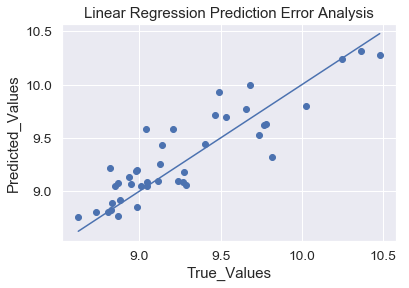

In [56]:
x = np.arange(y_test.min(),y_test.max(),.00001) 


plt.scatter(y_test,pred_lr)
plt.plot(x,x) 
plt.xlabel("True_Values")
plt.ylabel("Predicted_Values")
plt.title("Linear Regression Prediction Error Analysis")
plt.show()



**Linear Regression (using normalized data) = no change**

In [57]:
linreg_sc = LinearRegression()
parameters = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}
grid_linear_sc = GridSearchCV(linreg_sc, parameters, cv=num_cv, verbose=1 , scoring = score_calc)
grid_linear_sc.fit(X_train_sc, y_train)

sc_linear_sc = get_best_score(grid_linear_sc)

pred_lr_sc = pd.Series(grid_linear_sc.predict(X_test_sc))

Fitting 5 folds for each of 8 candidates, totalling 40 fits
0.2246004953705012
{'copy_X': True, 'fit_intercept': True, 'normalize': False}
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.0s finished
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


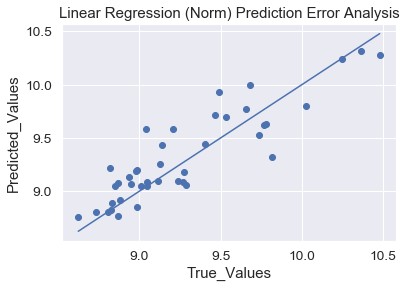

In [58]:
x = np.arange(y_test.min(),y_test.max(),.00001) 


plt.scatter(y_test,pred_lr_sc)
plt.plot(x,x) 
plt.xlabel("True_Values")
plt.ylabel("Predicted_Values")
plt.title("Linear Regression (Norm) Prediction Error Analysis")
plt.show()


**Ridge Regression**

In [59]:
from sklearn.linear_model import Ridge

ridge = Ridge()
parameters = {'alpha':[0.001,0.005,0.01,0.1,0.5,1], 'normalize':[True,False], 'tol':[1e-06,5e-06,1e-05,5e-05]}
grid_ridge = GridSearchCV(ridge, parameters, cv=num_cv, verbose=1, scoring = score_calc)
grid_ridge.fit(X_train, y_train)

sc_ridge = get_best_score(grid_ridge)


pred_ridge = pd.Series(grid_ridge.predict(X_test))

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.22291408739317972
{'alpha': 0.1, 'normalize': True, 'tol': 1e-06}
Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=True, random_state=None, solver='auto', tol=1e-06)


[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed:    1.8s finished
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


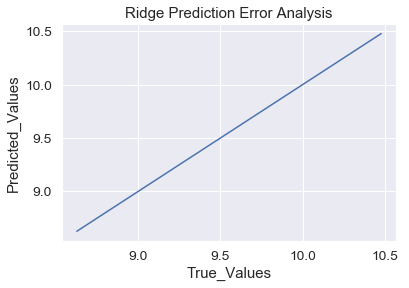

In [60]:
x = np.arange(y_test.min(),y_test.max(),.00001) 


#plt.scatter(y_test,pred_ridge)
plt.plot(x,x) 
plt.xlabel("True_Values")
plt.ylabel("Predicted_Values")
plt.title("Ridge Prediction Error Analysis")
plt.show()


**Ridge Regression (using normalized data) = no change**

In [61]:
ridge_sc = Ridge()
parameters = {'alpha':[0.001,0.005,0.01,0.1,0.5,1], 'normalize':[True,False], 'tol':[1e-06,5e-06,1e-05,5e-05]}
grid_ridge_sc = GridSearchCV(ridge_sc, parameters, cv=num_cv, verbose=1, scoring = score_calc)
grid_ridge_sc.fit(X_train_sc, y_train)

sc_ridge_sc = get_best_score(grid_ridge_sc)

pred_ridge_sc = pd.Series(grid_ridge_sc.predict(X_test_sc))

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.22291408739317972
{'alpha': 0.1, 'normalize': True, 'tol': 1e-06}
Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=True, random_state=None, solver='auto', tol=1e-06)


[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed:    0.8s finished
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


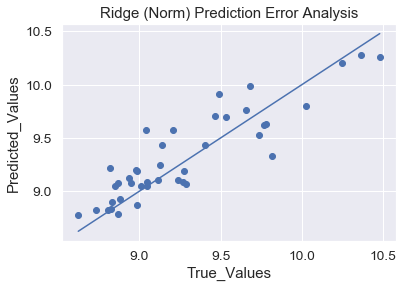

In [62]:
x = np.arange(y_test.min(),y_test.max(),.00001) 


plt.scatter(y_test,pred_ridge_sc)
plt.plot(x,x) 
plt.xlabel("True_Values")
plt.ylabel("Predicted_Values")
plt.title("Ridge (Norm) Prediction Error Analysis")
plt.show()


**Lasso Regression**

In [63]:
from sklearn.linear_model import Lasso

lasso = Lasso()
parameters = {'alpha':[1e-03,0.01,0.1,0.5,0.8,1], 'normalize':[True,False], 'tol':[1e-06,1e-05,5e-05,1e-04,5e-04,1e-03]}
grid_lasso = GridSearchCV(lasso, parameters, cv=num_cv, verbose=1, scoring = score_calc)
grid_lasso.fit(X_train, y_train)

sc_lasso = get_best_score(grid_lasso)

pred_lasso = pd.Series(grid_lasso.predict(X_test))

Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.22473010710433186
{'alpha': 0.001, 'normalize': False, 'tol': 0.0005}
Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0005, warm_start=False)


[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed:    3.1s finished
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


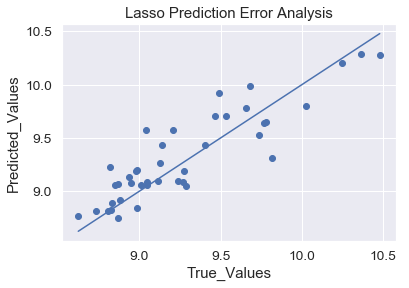

In [64]:
x = np.arange(y_test.min(),y_test.max(),.00001) 


plt.scatter(y_test,pred_lasso)
plt.plot(x,x) 
plt.xlabel("True_Values")
plt.ylabel("Predicted_Values")
plt.title("Lasso Prediction Error Analysis")
plt.show()


**Lasso Regression (normalized)**

In [65]:
lasso_sc = Lasso()
parameters = {'alpha':[1e-03,0.01,0.1,0.5,0.8,1], 'normalize':[True,False], 'tol':[1e-06,1e-05,5e-05,1e-04,5e-04,1e-03]}
grid_lasso_sc = GridSearchCV(lasso_sc, parameters, cv=num_cv, verbose=1, scoring = score_calc)
grid_lasso_sc.fit(X_train_sc, y_train)

sc_lasso_sc = get_best_score(grid_lasso_sc)

pred_lasso_sc = pd.Series(grid_lasso_sc.predict(X_test_sc))

Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.22458404729843834
{'alpha': 0.001, 'normalize': False, 'tol': 0.001}
Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.001, warm_start=False)


[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed:    1.0s finished
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


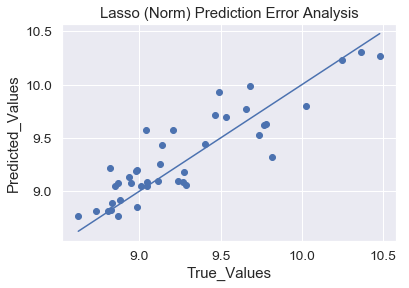

In [66]:
x = np.arange(y_test.min(),y_test.max(),.00001) 


plt.scatter(y_test,pred_lasso_sc)
plt.plot(x,x) 
plt.xlabel("True_Values")
plt.ylabel("Predicted_Values")
plt.title("Lasso (Norm) Prediction Error Analysis")
plt.show()


**ElasticNet**

In [67]:
from sklearn.linear_model import ElasticNet

enet = ElasticNet()
parameters = {'alpha' :[0.1,1.0,10], 'max_iter' :[1000000], 'l1_ratio':[0.04,0.05], 
              'fit_intercept' : [False,True], 'normalize':[True,False], 'tol':[1e-02,1e-03,1e-04]}

grid_enet = GridSearchCV(enet, parameters, cv=num_cv, verbose=1, scoring = score_calc)
grid_enet.fit(X_train, y_train)

sc_enet = get_best_score(grid_enet)

pred_enet = pd.Series(grid_enet.predict(X_test))

Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.24416676746097646
{'alpha': 0.1, 'fit_intercept': True, 'l1_ratio': 0.04, 'max_iter': 1000000, 'normalize': False, 'tol': 0.0001}
ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.04,
      max_iter=1000000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)


[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed:    3.0s finished
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


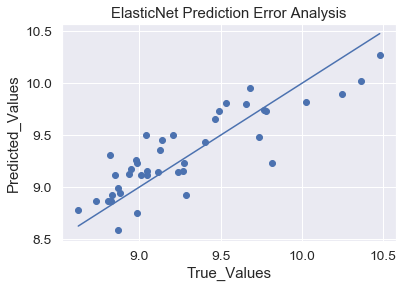

In [68]:
x = np.arange(y_test.min(),y_test.max(),.00001) 


plt.scatter(y_test,pred_enet)
plt.plot(x,x) 
plt.xlabel("True_Values")
plt.ylabel("Predicted_Values")
plt.title("ElasticNet Prediction Error Analysis")
plt.show()


**Elastic Net (Normalized)**

In [69]:
enet_sc = ElasticNet()
parameters = {'alpha' :[0.1,1.0,10], 'max_iter' :[1000000], 'l1_ratio':[0.04,0.05], 
              'fit_intercept' : [False,True], 'normalize':[True,False], 'tol':[1e-02,1e-03,1e-04]}

grid_enet_sc = GridSearchCV(enet_sc, parameters, cv=num_cv, verbose=1, scoring = score_calc)
grid_enet_sc.fit(X_train_sc, y_train)

sc_enet_sc = get_best_score(grid_enet_sc)

pred_enet_sc = pd.Series(grid_enet_sc.predict(X_test_sc))

Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.2234309990751774
{'alpha': 0.1, 'fit_intercept': True, 'l1_ratio': 0.04, 'max_iter': 1000000, 'normalize': False, 'tol': 0.0001}
ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.04,
      max_iter=1000000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)


[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed:    1.1s finished
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


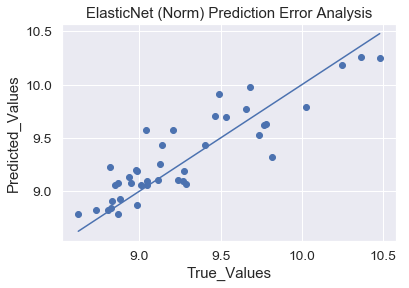

In [70]:
x = np.arange(y_test.min(),y_test.max(),.00001) 


plt.scatter(y_test,pred_enet_sc)
plt.plot(x,x) 
plt.xlabel("True_Values")
plt.ylabel("Predicted_Values")
plt.title("ElasticNet (Norm) Prediction Error Analysis")
plt.show()

**KNN Regressor**

In [71]:
from sklearn.neighbors import KNeighborsRegressor

Knn = KNeighborsRegressor()
param_grid = {'n_neighbors' : [3,4,5,6,7,10,15] ,    
              'weights' : ['uniform','distance']}

grid_knn = GridSearchCV(Knn, param_grid, cv=num_cv, refit=True, verbose=1, scoring = score_calc)
grid_knn.fit(X_train, y_train)

sc_knn = get_best_score(grid_knn)

pred_knn = pd.Series(grid_knn.predict(X_test))

Fitting 5 folds for each of 14 candidates, totalling 70 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.23428474667970592
{'n_neighbors': 6, 'weights': 'distance'}
KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=6, p=2,
          weights='distance')


[Parallel(n_jobs=1)]: Done  70 out of  70 | elapsed:    0.7s finished
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


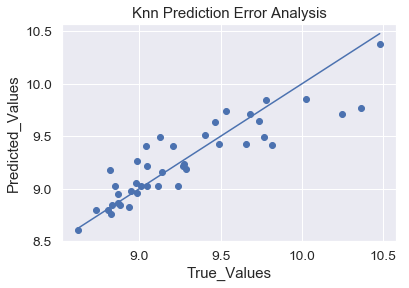

In [72]:
x = np.arange(y_test.min(),y_test.max(),.00001) 


plt.scatter(y_test,pred_knn)
plt.plot(x,x) 
plt.xlabel("True_Values")
plt.ylabel("Predicted_Values")
plt.title("Knn Prediction Error Analysis")
plt.show()

**KNN REgressor (Normalized)**

In [73]:
Knn_sc = KNeighborsRegressor()
param_grid = {'n_neighbors' : [3,4,5,6,7,10,15] ,    
              'weights' : ['uniform','distance']}

grid_knn_sc = GridSearchCV(Knn_sc, param_grid, cv=num_cv, refit=True, verbose=1, scoring = score_calc)
grid_knn_sc.fit(X_train_sc, y_train)

sc_knn_sc = get_best_score(grid_knn_sc)


pred_knn_sc = pd.Series(grid_knn_sc.predict(X_test_sc))

Fitting 5 folds for each of 14 candidates, totalling 70 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.23327762437301144
{'n_neighbors': 5, 'weights': 'distance'}
KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=5, p=2,
          weights='distance')


[Parallel(n_jobs=1)]: Done  70 out of  70 | elapsed:    0.3s finished
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


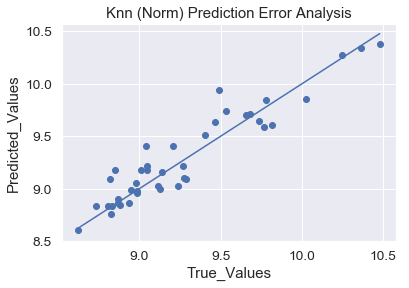

In [74]:
x = np.arange(y_test.min(),y_test.max(),.00001) 


plt.scatter(y_test,pred_knn_sc)
plt.plot(x,x) 
plt.xlabel("True_Values")
plt.ylabel("Predicted_Values")
plt.title("Knn (Norm) Prediction Error Analysis")
plt.show()

**Decision Tree**

In [75]:
from sklearn.tree import DecisionTreeRegressor

param_grid = { 'max_depth' : [3,4,5,6] , 'max_features' : [1,2,3] ,
               'max_leaf_nodes' : [3,4,5] ,'min_samples_split' : [20,25,30],
                'presort': [False,True] , 'random_state': [5] }
            
grid_dtree = GridSearchCV(DecisionTreeRegressor(), param_grid, cv=num_cv, refit=True, verbose=1, scoring = score_calc)
grid_dtree.fit(X_train_dt_rf, y_train_dt_rf)

sc_dtree = get_best_score(grid_dtree)

pred_dtree = pd.Series(grid_dtree.predict(X_test_dt_rf))

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.27942601632002073
{'max_depth': 3, 'max_features': 3, 'max_leaf_nodes': 5, 'min_samples_split': 20, 'presort': False, 'random_state': 5}
DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=3,
           max_leaf_nodes=5, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=20, min_weight_fraction_leaf=0.0,
           presort=False, random_state=5, splitter='best')


[Parallel(n_jobs=1)]: Done 1080 out of 1080 | elapsed:    9.0s finished
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


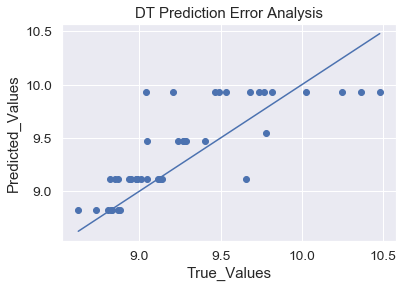

In [76]:
x = np.arange(y_test.min(),y_test.max(),.00001) 

plt.scatter(y_test_dt_rf,pred_dtree)
plt.plot(x,x) 
plt.xlabel("True_Values")
plt.ylabel("Predicted_Values")
plt.title("DT Prediction Error Analysis")
plt.show()

**Random Forest**

In [77]:
from sklearn.ensemble import RandomForestRegressor

param_grid = {'min_samples_split' : [3,4,6,10], 'n_estimators' : [5], 'random_state': [5] }
grid_rf = GridSearchCV(RandomForestRegressor(), param_grid, cv=num_cv, refit=True, verbose=1, scoring = score_calc)
grid_rf.fit(X_train_dt_rf, y_train_dt_rf)

sc_rf = get_best_score(grid_rf)

pred_rf = pd.Series(grid_rf.predict(X_test_dt_rf))

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.16895651415852858
{'min_samples_split': 3, 'n_estimators': 5, 'random_state': 5}
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=3,
           min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=None,
           oob_score=False, random_state=5, verbose=0, warm_start=False)


[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.3s finished


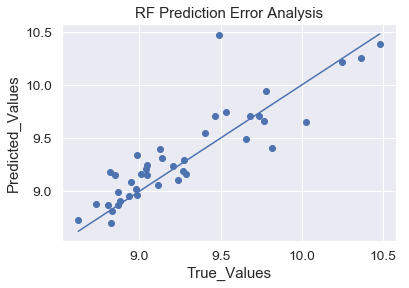

In [78]:
x = np.arange(y_test.min(),y_test.max(),.00001) 

plt.scatter(y_test_dt_rf,pred_rf)
plt.plot(x,x) 
plt.xlabel("True_Values")
plt.ylabel("Predicted_Values")
plt.title("RF Prediction Error Analysis")
plt.show()

# Conclusion: 

In [79]:
list_scores = [sc_linear, sc_linear_sc, sc_ridge, sc_ridge_sc, sc_lasso, sc_lasso_sc, sc_enet, sc_enet_sc,sc_knn, sc_knn_sc,sc_dtree,sc_rf]
               
list_regressors = ['Linear','Linear-N','Ridge','Ridge-N','Lasso','Lasso-N','ElaNet','ElaNet-N','KNN','KNN-N','DT','RF']

In [80]:
Scores_df=pd.DataFrame(list(zip(list_scores,list_regressors)),columns=["Scores","Regressors"])

Scores_df.sort_values("Scores")

,Scores,Regressors
11,0.168957,RF
2,0.222914,Ridge
3,0.222914,Ridge-N
7,0.223431,ElaNet-N
5,0.224584,Lasso-N
1,0.224600,Linear-N
0,0.224600,Linear
4,0.224730,Lasso
9,0.233278,KNN-N
8,0.234285,KNN


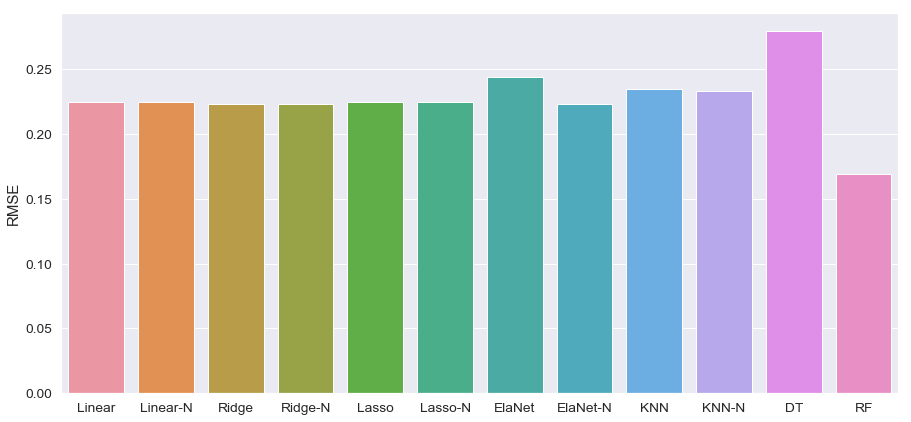

In [81]:
fig, ax = plt.subplots()
fig.set_size_inches(15,7)
sns.barplot(x=list_regressors, y=list_scores, ax=ax)
plt.ylabel('RMSE')
plt.show()

## Random Forest is the best algorithm to predict car prices

In [82]:
#Initiate/Fitting Data with optimal parameters 

rf = RandomForestRegressor(n_estimators=5,min_samples_split=3,random_state=5)
## Fit the model on your training data.
rf.fit(X_train_dt_rf, y_train_dt_rf) 
## And score it on your testing data.
rf.score(X_test_dt_rf, y_test_dt_rf)

0.7493905634548057

### Importance of Features used in the Random Forest algorithm

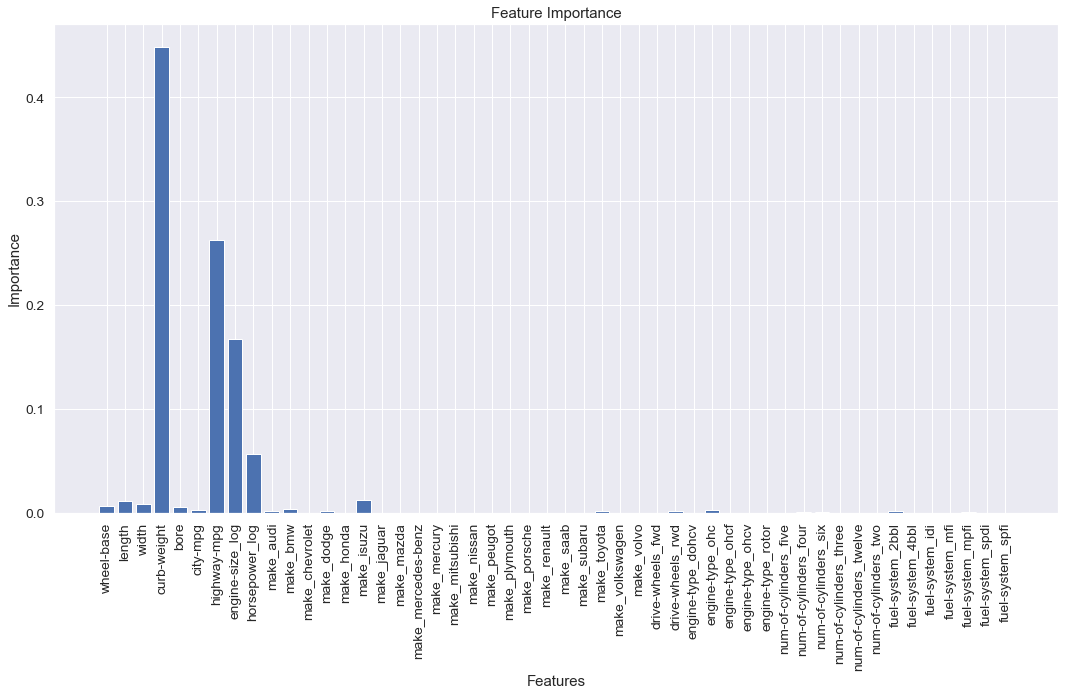

In [83]:
Importance=rf.feature_importances_
Columns=RF_DT_Dataset_df.columns


plt.figure(figsize=(18,9))
plt.xticks(rotation="vertical")
plt.bar(x=Columns,height=Importance)
plt.ylabel("Importance")
plt.xlabel("Features")
plt.title ("Feature Importance")

a=list(zip(Columns,Importance))

In [84]:
b=sorted((value,key) for (key,value) in a)
b

[(0.0, 'engine-type_dohcv'),
 (0.0, 'engine-type_ohcf'),
 (0.0, 'engine-type_ohcv'),
 (0.0, 'engine-type_rotor'),
 (0.0, 'fuel-system_4bbl'),
 (0.0, 'fuel-system_idi'),
 (0.0, 'fuel-system_mfi'),
 (0.0, 'fuel-system_spfi'),
 (0.0, 'make_jaguar'),
 (0.0, 'make_mercedes-benz'),
 (0.0, 'make_porsche'),
 (0.0, 'num-of-cylinders_five'),
 (0.0, 'num-of-cylinders_three'),
 (0.0, 'num-of-cylinders_twelve'),
 (0.0, 'num-of-cylinders_two'),
 (3.193684956667235e-08, 'make_renault'),
 (1.3485300012645163e-05, 'make_volkswagen'),
 (2.0483839981337955e-05, 'make_chevrolet'),
 (2.5435862250846518e-05, 'make_nissan'),
 (5.585213373166413e-05, 'make_volvo'),
 (5.653251613805468e-05, 'make_mercury'),
 (6.706755612680139e-05, 'fuel-system_spdi'),
 (9.071438314270592e-05, 'make_mitsubishi'),
 (0.00012695151513982954, 'make_peugot'),
 (0.0001330708446091316, 'make_saab'),
 (0.00016069287997862313, 'make_honda'),
 (0.00016145789687395121, 'make_plymouth'),
 (0.00018388334759358464, 'make_subaru'),
 (0.00021

In [85]:
#pd.DataFrame({"LR":pred_lr,"LR_N":pred_lr_sc,"Ridge":pred_ridge,"Ridge_sc":pred_ridge_sc,"Lasso":pred_lasso,"Lasso_sc":pred_lasso_sc,"ElasticNet":pred_enet,"ElasticNet_Norm":pred_enet_sc,"KNN":pred_knn,"KNN_Norm":pred_knn_sc,"DT":pred_dtree,"RF":pred_rf},columns=['Linear','Linear-N','Ridge','Ridge-N','Lasso','Lasso-N','ElaNet','ElaNet-N','KNN','KNN-N','DT','RF'])